# The codes related with supplementary fig. 6-9

## Load

In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import warnings
warnings.filterwarnings("ignore")

#from SCCAF import *
#import scvi

from glob import iglob
from tqdm import tqdm
import scanpy as sc

In [ ]:
import pandas as pd
import seaborn as sns

In [3]:
import pickle

In [4]:
from glob import iglob 

In [5]:
from scipy.stats import median_abs_deviation

In [6]:
from scAnnot.tools import *

In [50]:
import matplotlib as mpl
sc.set_figure_params(scanpy=True, fontsize=14,facecolor=None,frameon=False,transparent=True)
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.grid'] = False

## Read in

In [17]:
with open(f'data/hipngs/hm3f4a_noBr_hip_integration_rmPyr_Micro_qc1_reharmony_anno_final1.pickle', 'rb') as handle:
    ad=pickle.load(handle)

In [18]:
ad.X=ad.X.todense()

In [19]:
label={
'Oligodendrocytes':'Oligodendrocyte', 
'Granule':'Glutamatergic', 
'Astrocytes':'Astrocyte', 
'OPC':'Oligodendrocyte precursor',
'Neuroblast':'Neuroblast', 
'GABA':'GABAergic', 
'ImGranule':'Immature Glutamatergic', 
'CA neurons':'CA neurons',
'Endothelial':'Endothelial', 
'NFOL':'Newly formed oligodendrocyte', 
'NPC':'Neural progenitor'
}

In [20]:
ad.obs['anno1'] = ad.obs['anno'].replace(label)

In [12]:
study={'Hochgerner2018':'Hochgerner et al.', 
       'Zhong2020':'Zhong et al.', 
       'Yi2022': 'Zhou et al.', 
       'Tran2021': 'Tran et al.', 
       'Fatma2020':'Ayhan et al.', 
       'Franjic2021':'Franjic et al.'}
ad.obs['study']=ad.obs['study'].replace(study)

In [ ]:
ad.obs['study'].value_counts()

In [133]:
group={'Hochgerner2018':'Mouse_Hochgerner et al.', 
       'Zhong2020':'Fetus_Zhong et al.', 
       'Infant_Yi2022':'Infant_Zhou et al.', 
       'Child_Yi2022':'Child_Zhou et al.', 
       'Yi2022':'Adult_Zhou et al.', 
       'Tran2021':'Adult_Tran et al.', 
       'Fatma2020':'Adult_Ayhan et al.', 
       'Franjic2021':'Adult_Franjic et al.'}

In [ ]:
ad.obs['group1']=ad.obs.group.replace(group)

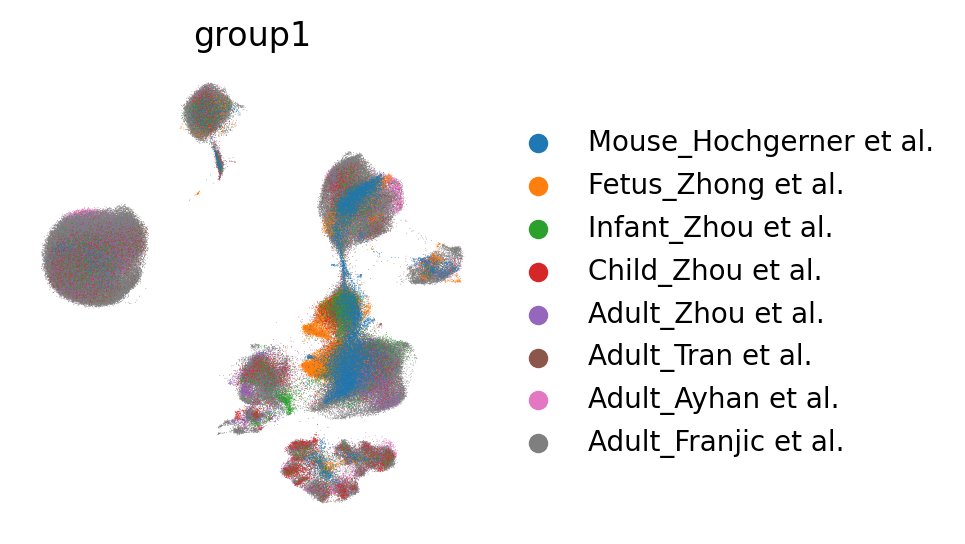

In [ ]:
sc.pl.umap(ad,color='group1',frameon=False)

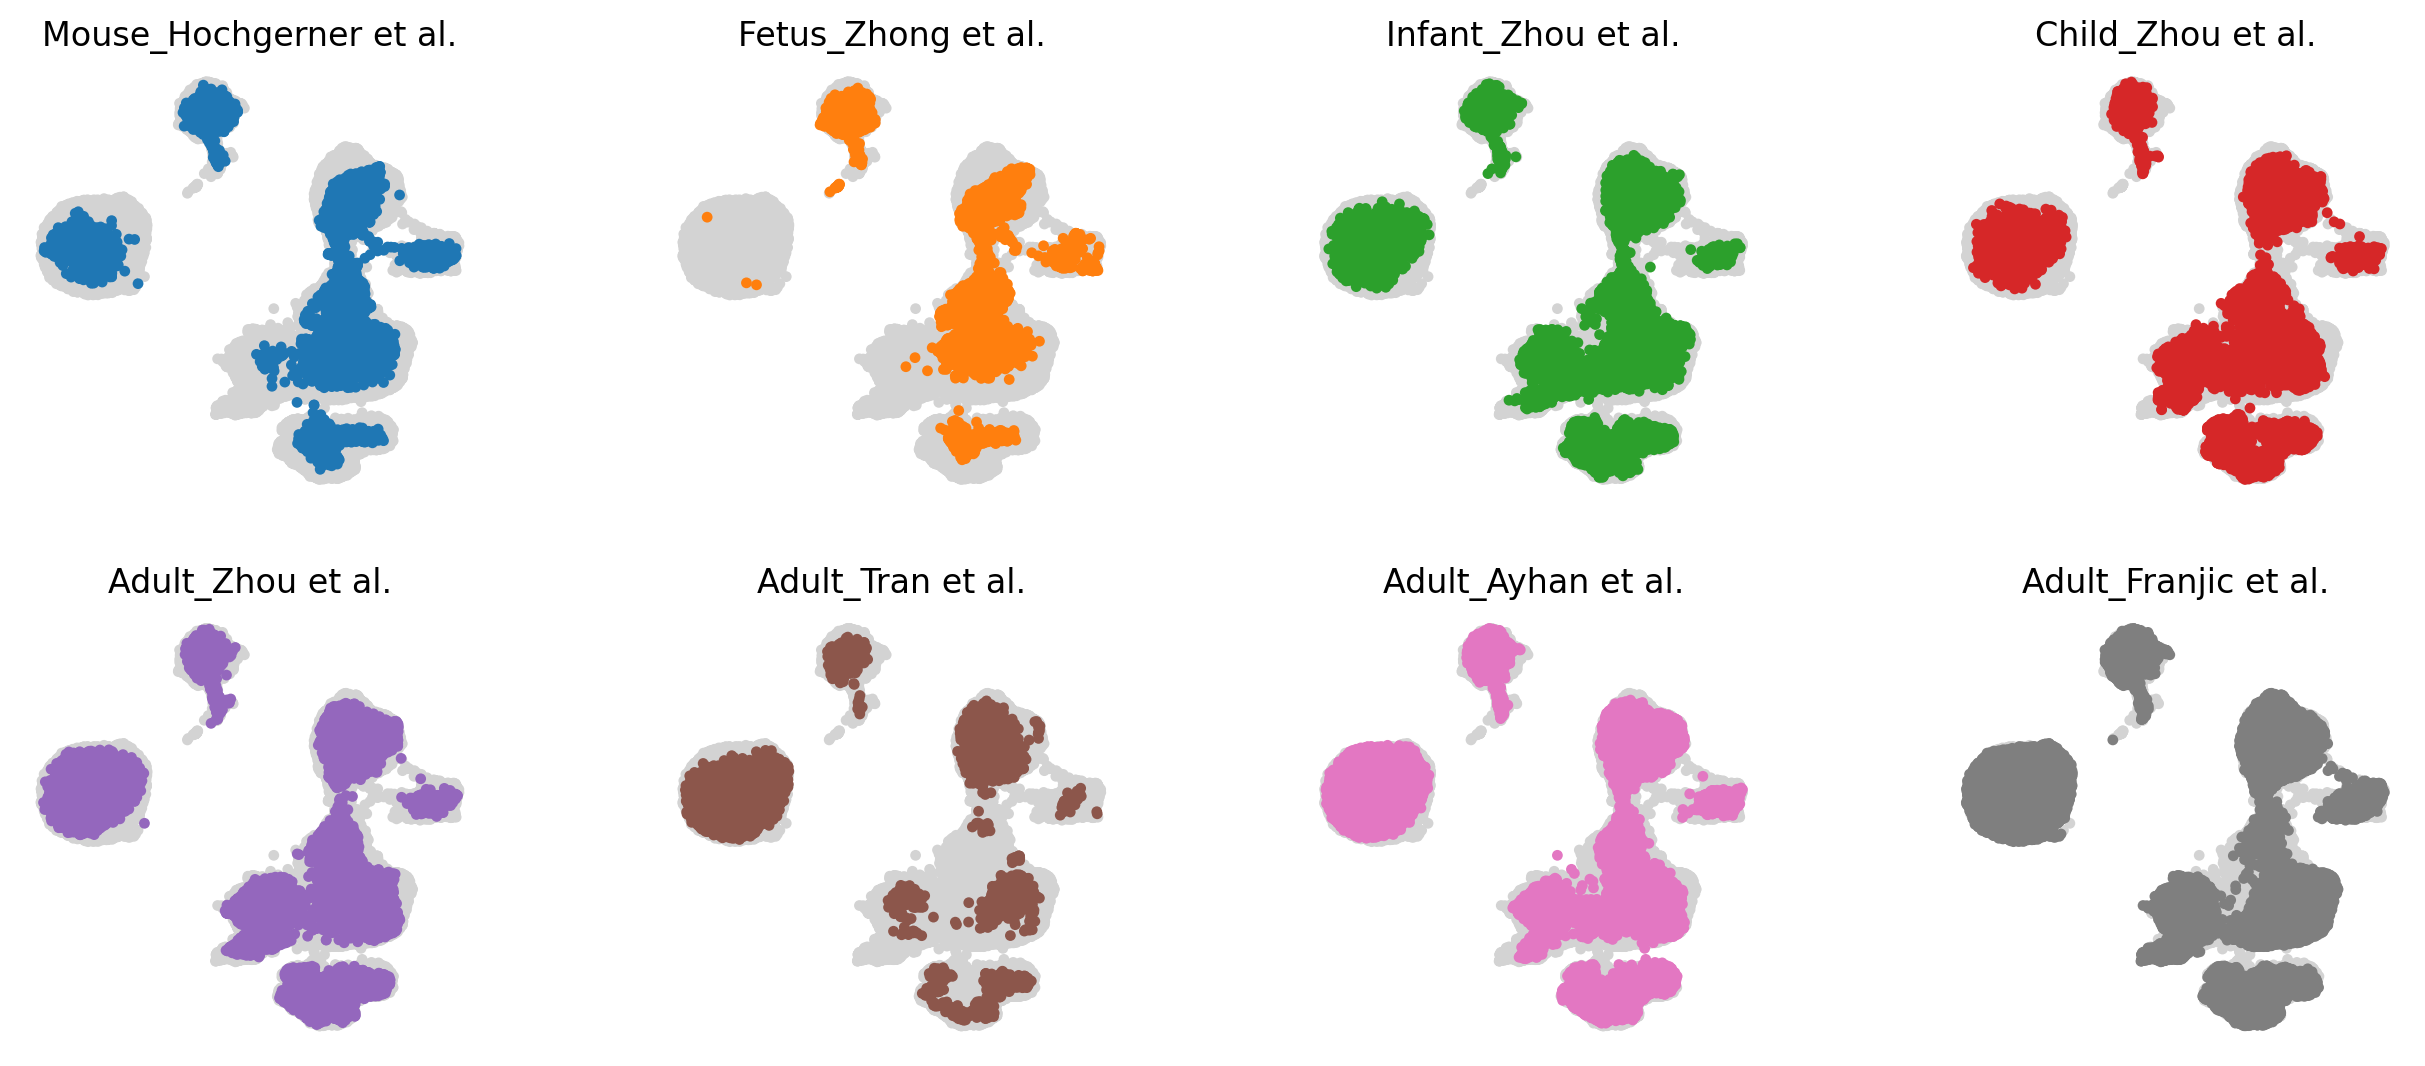

In [ ]:
cluster_small_multiples(ad,'group1')

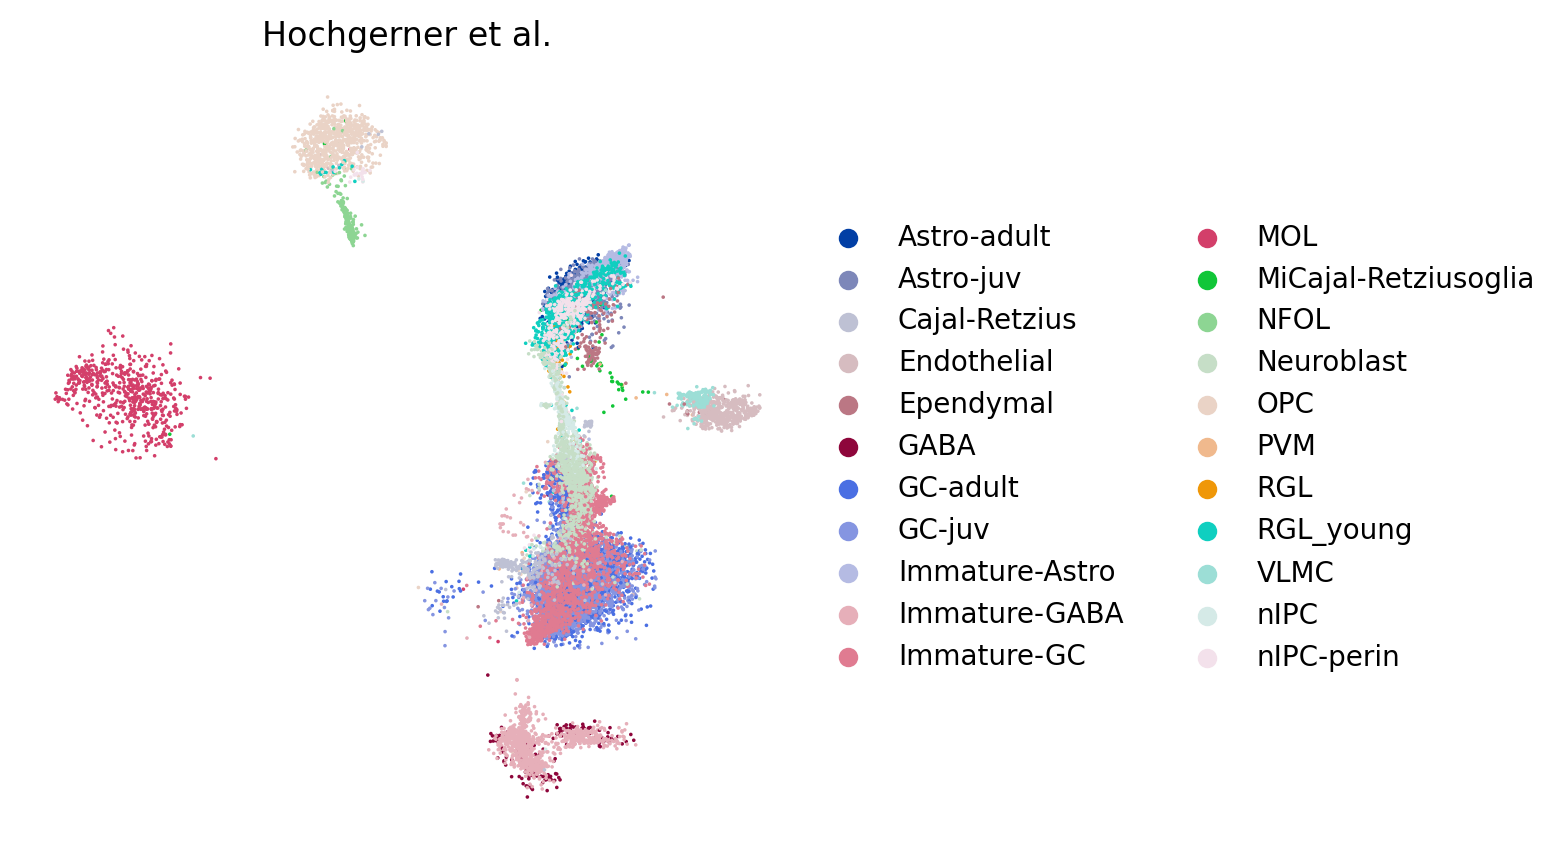

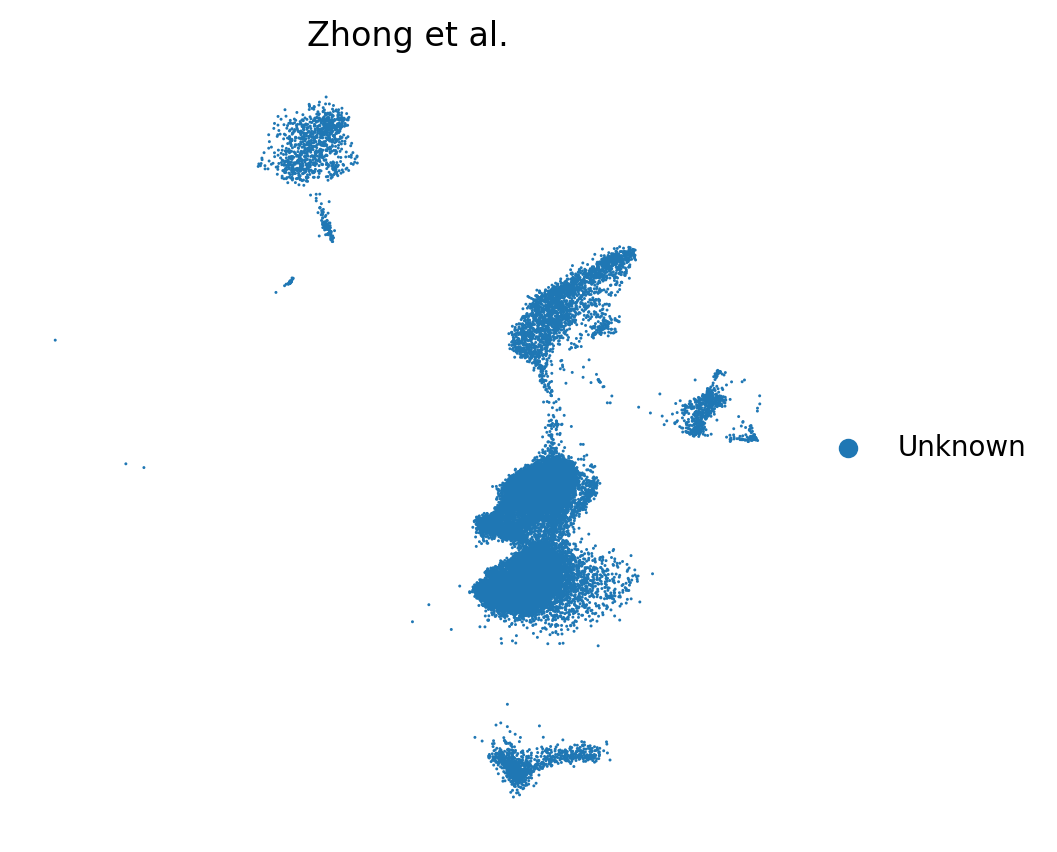

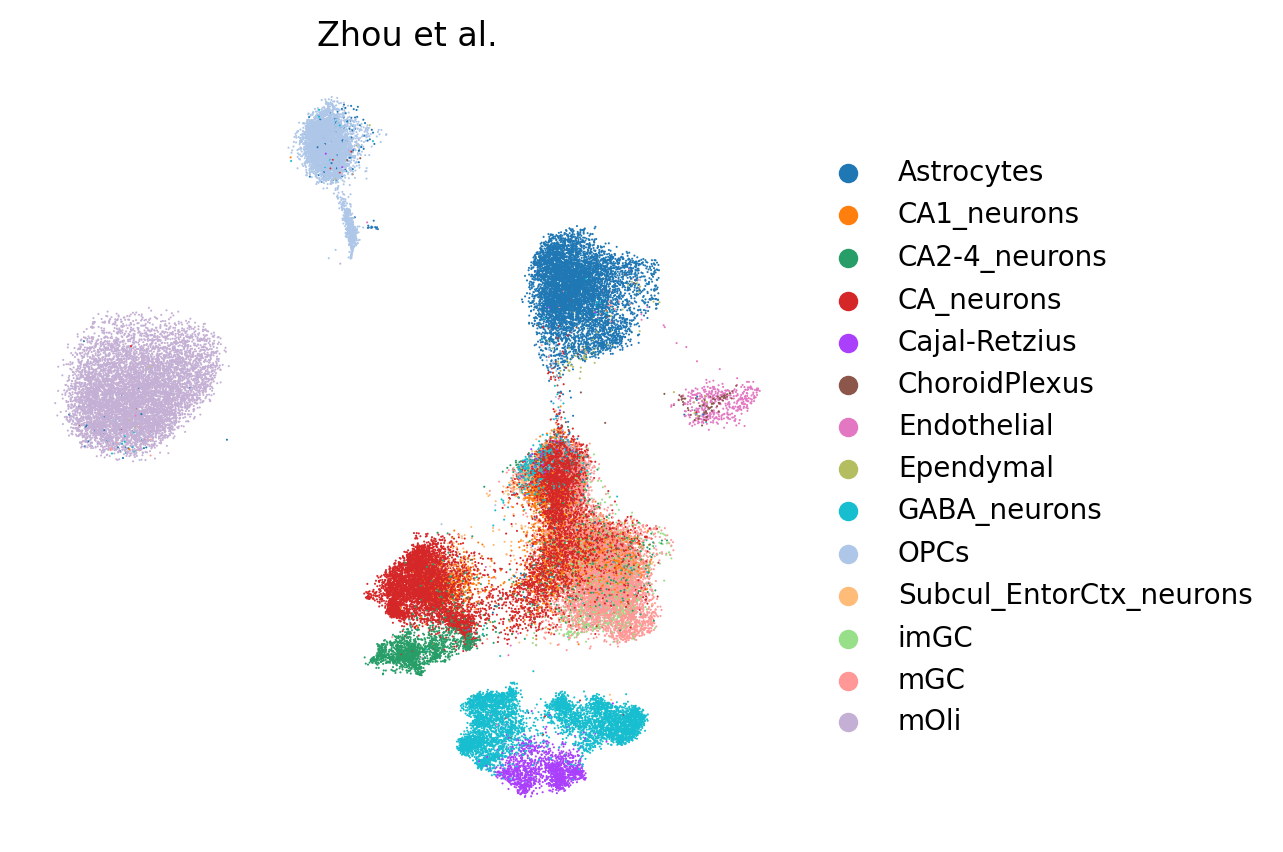

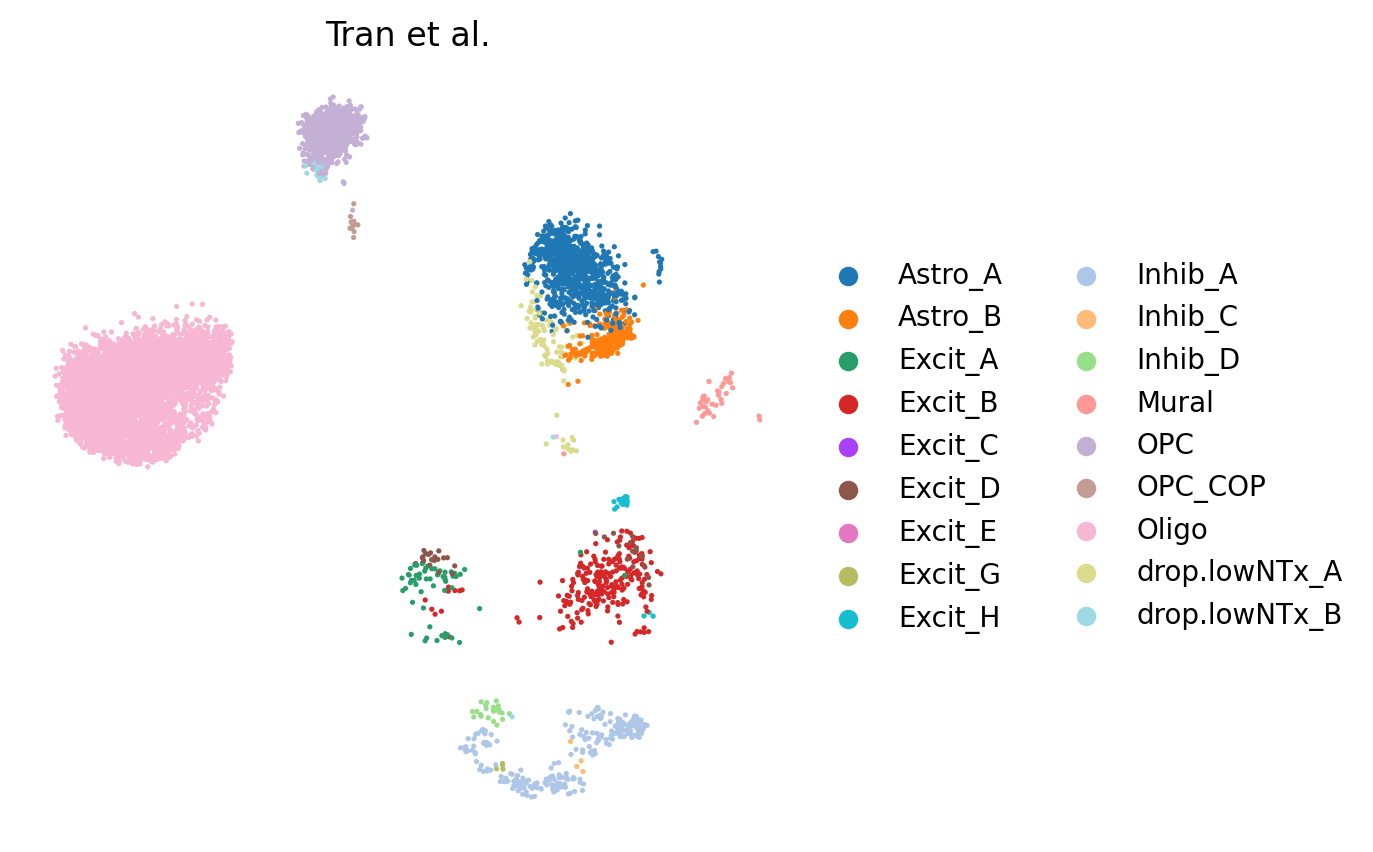

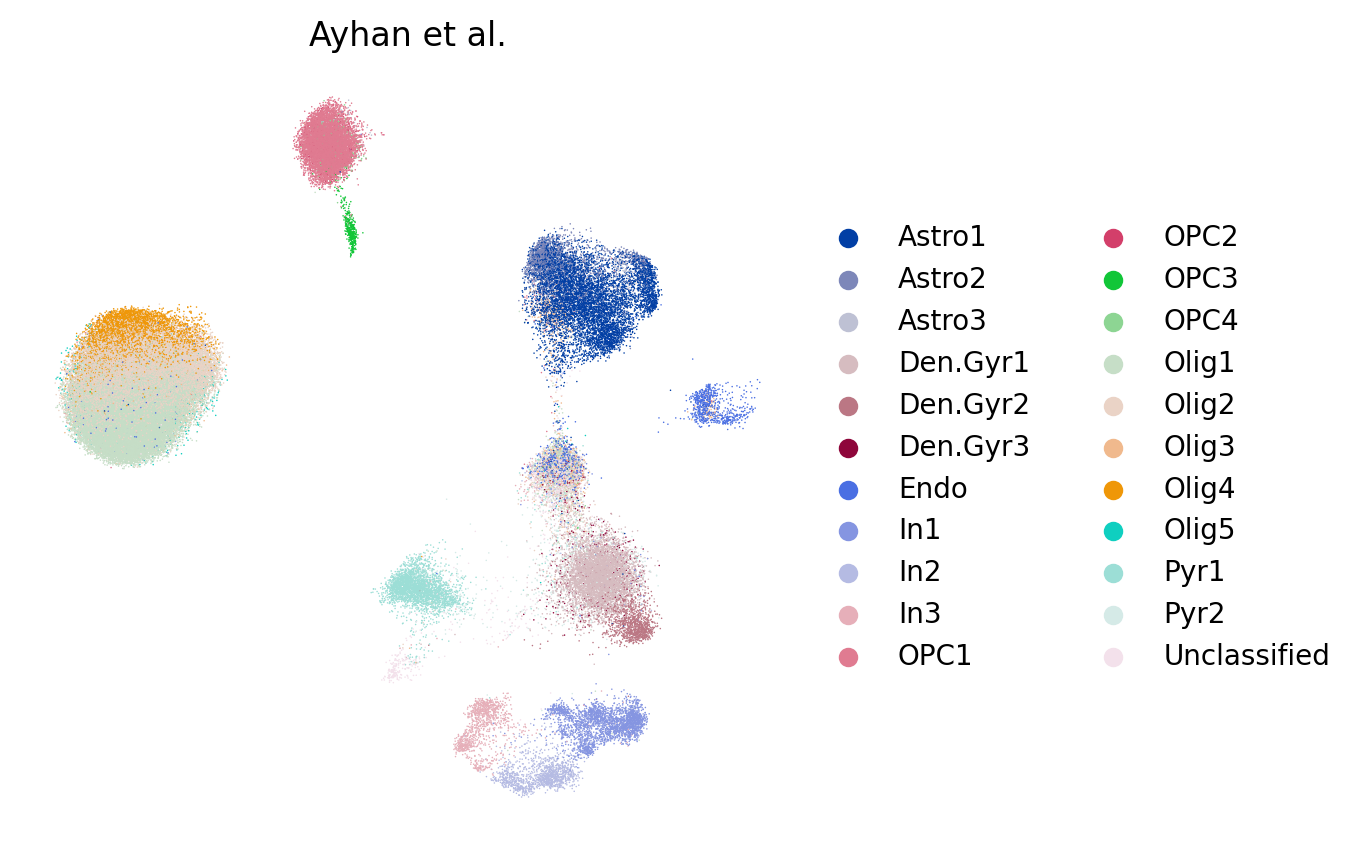

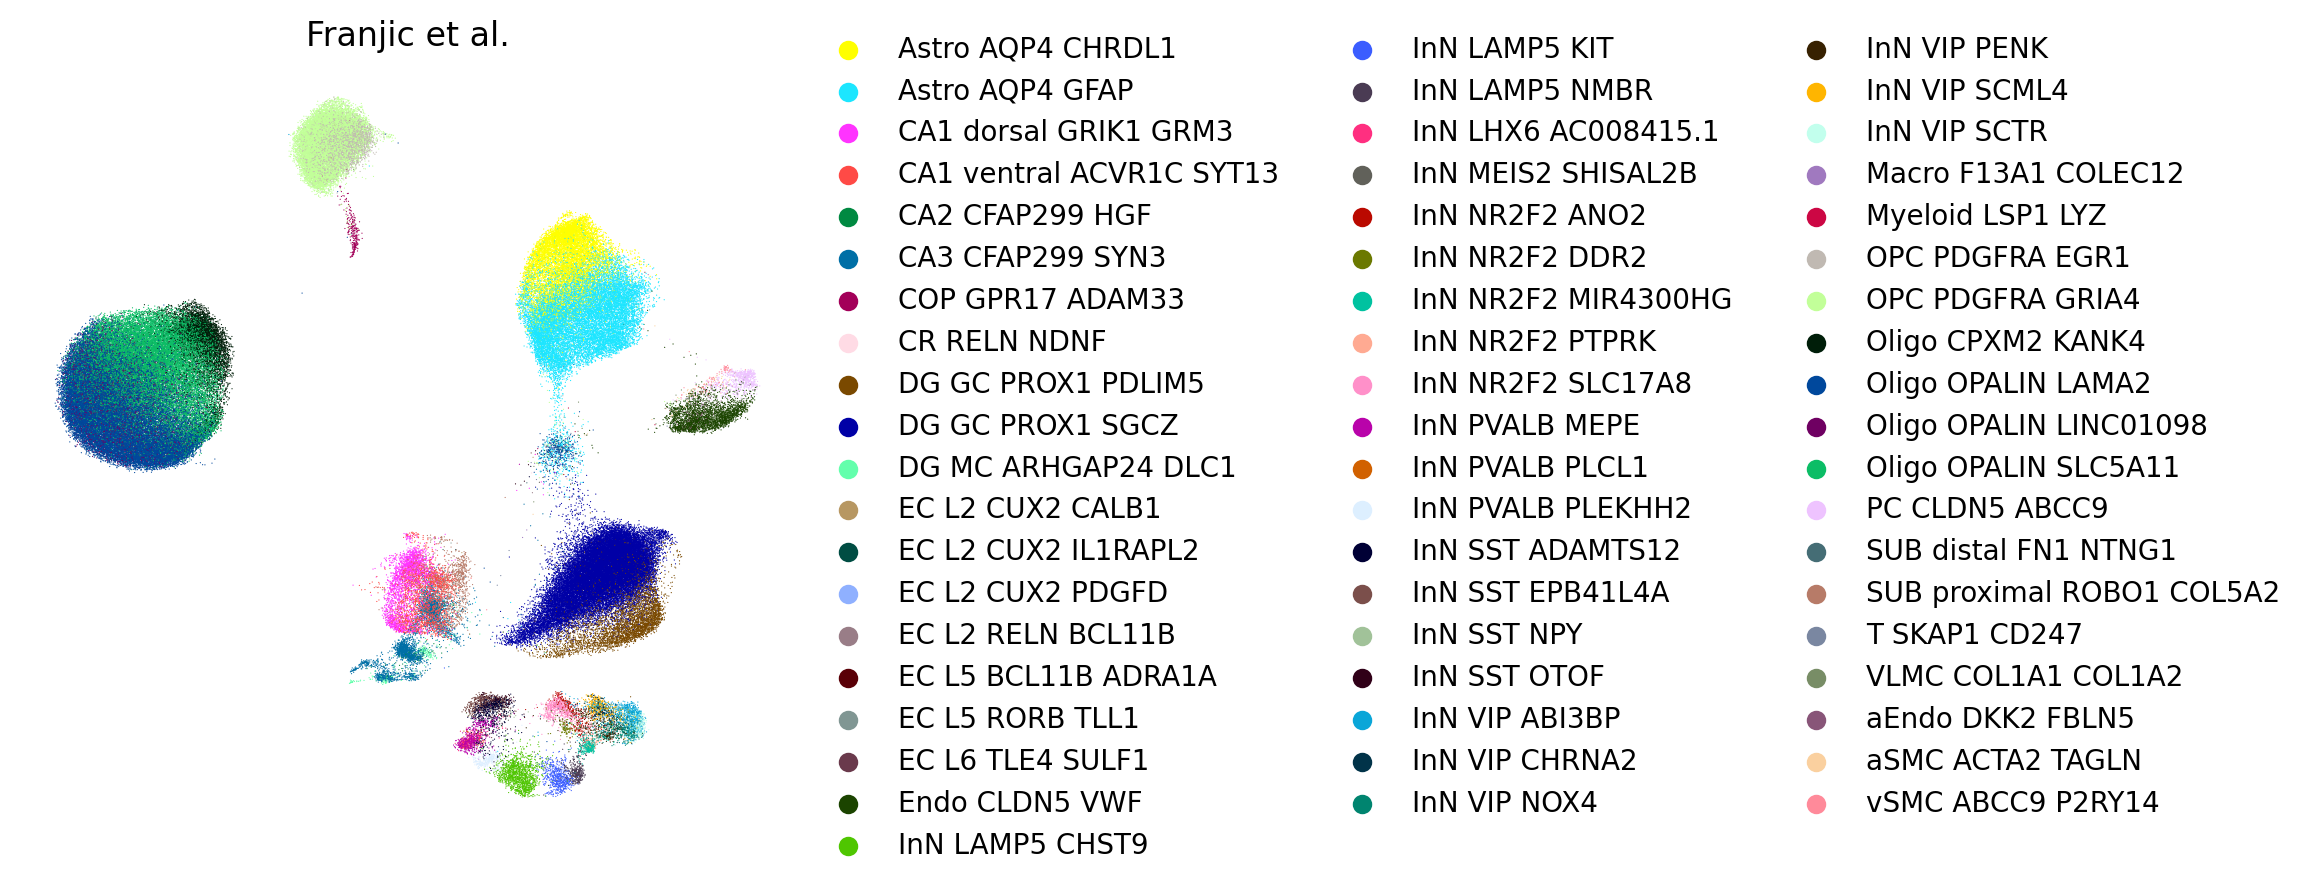

In [ ]:
for i in ad.obs.study.cat.categories:
    ad1=ad[ad.obs.study==i].copy()
    ad1.obs['cellType']=ad1.obs['cellType'].astype(str)
    sc.pl.umap(ad1,color='cellType',frameon=False,title=i)

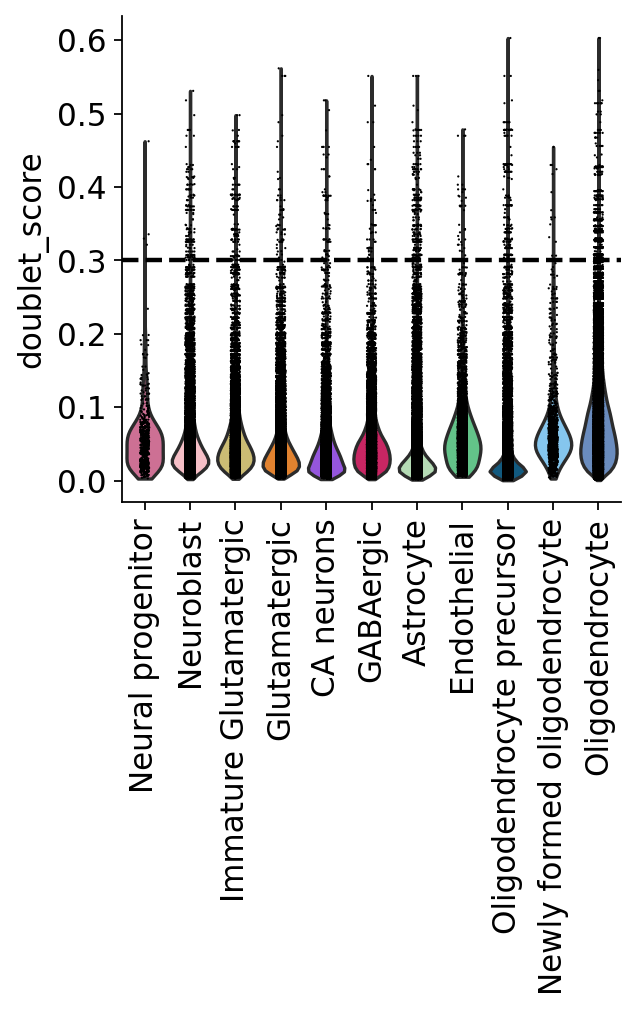

In [95]:
figsize(4,4)
fig, ax = plt.subplots()
sc.pl.violin(ad, keys=['doublet_score'], groupby='anno1', rotation=90, ax=ax,show=False)
#ax.set_title('Doublet score')
ax.axhline(y=0.3, color='black', linestyle='--', linewidth=2)
plt.savefig('figures/rebutall_qc.pdf',dpi=300, bbox_inches='tight',transparent=True)

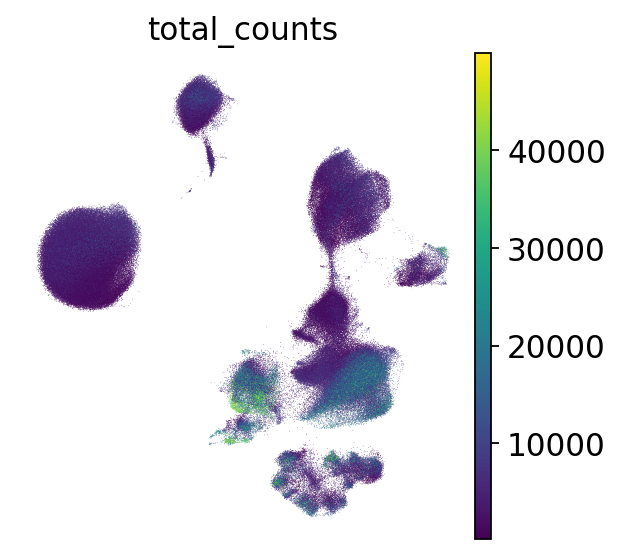

In [89]:
figsize(4,4)
sc.pl.umap(ad,color=['total_counts'],frameon=False,save='umap_qc_tc.pdf')

In [60]:
seq={'Hochgerner et al.':'scRNA-seq (mouse)', 
      'Zhong et al.':'scRNA-seq (human)', 
      'Zhou et al.':'snRNA-seq (human)', 
      'Tran et al.':'snRNA-seq (human)', 
      'Ayhan et al.':'snRNA-seq (human)', 
       'Franjic et al.':'snRNA-seq (human)'}
ad.obs['seq']=ad.obs['study'].replace(seq)

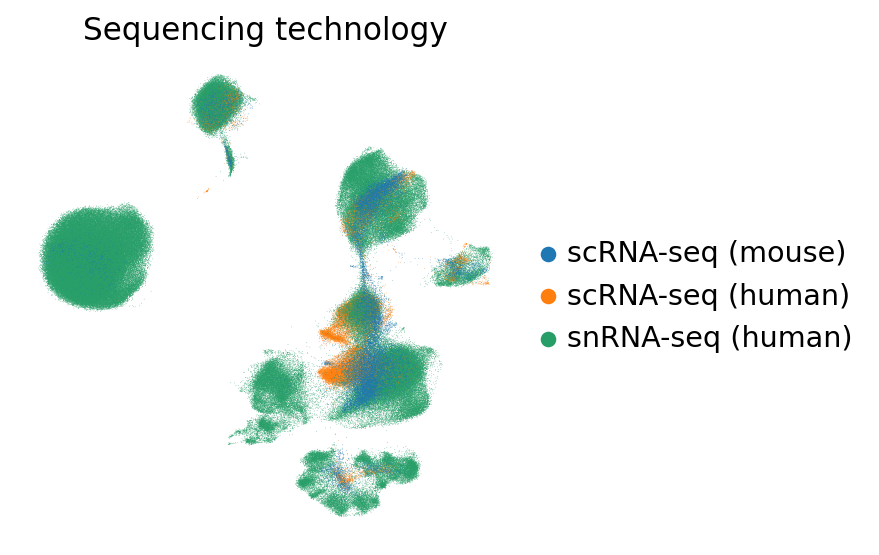

In [61]:
figsize(4,4)
sc.pl.umap(ad,color=['seq'],frameon=False,title='Sequencing technology')

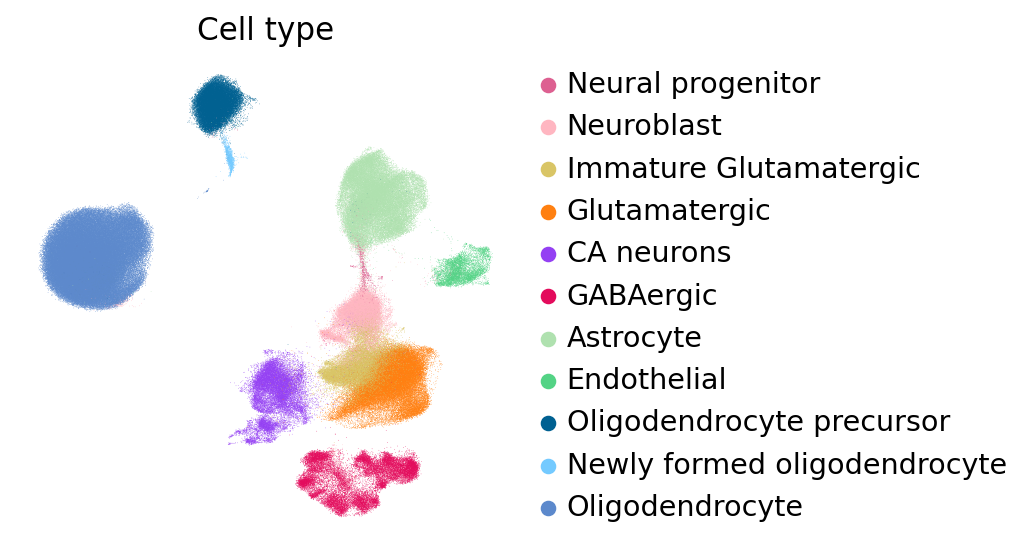

In [62]:
figsize(4,4)
sc.pl.umap(ad,color=['anno1'],frameon=False,title='Cell type')

In [90]:
ad.obs.study

P57_AAAGTAGGTCCAGTAT-0-0-0          Ayhan et al.
P57_AACCATGGTAAACACA-0-0-0          Ayhan et al.
P57_AACGTTGCACTTAACG-0-0-0          Ayhan et al.
P57_AACTCTTCATACTCTT-0-0-0          Ayhan et al.
P57_AACTTTCAGAGACTTA-0-0-0          Ayhan et al.
                                     ...        
10X82_1_CGTCAGTTTGACAC--7-1    Hochgerner et al.
10X82_1_AGGCCAGCCACGCT--7-1    Hochgerner et al.
10X82_1_GCAGTCAGTCACTA--7-1    Hochgerner et al.
10X82_1_CTCGTAGTGGGCTA--7-1    Hochgerner et al.
10X82_1_AGATCTCGTTACAG--7-1    Hochgerner et al.
Name: study, Length: 371851, dtype: category
Categories (6, object): ['Hochgerner et al.', 'Zhong et al.', 'Zhou et al.', 'Tran et al.', 'Ayhan et al.', 'Franjic et al.']

In [91]:
seq={'Hochgerner et al.':'Hochgerner et al. (scRNA-seq)', 
      'Zhong et al.':'Zhong et al. (scRNA-seq)', 
      'Zhou et al.':'Zhou et al. (snRNA-seq)', 
      'Tran et al.':'Tran et al. (snRNA-seq)', 
      'Ayhan et al.':'Ayhan et al. (snRNA-seq)', 
       'Franjic et al.':'Franjic et al. (snRNA-seq)'}
ad.obs['seq']=ad.obs['study'].replace(seq)

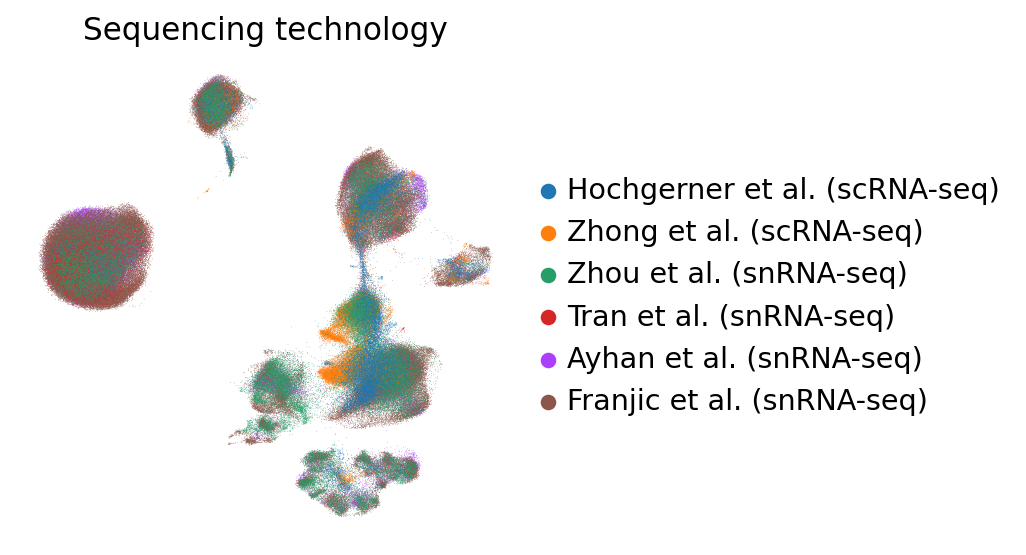

In [92]:
figsize(4,4)
sc.pl.umap(ad,color=['seq'],frameon=False,title='Sequencing technology')

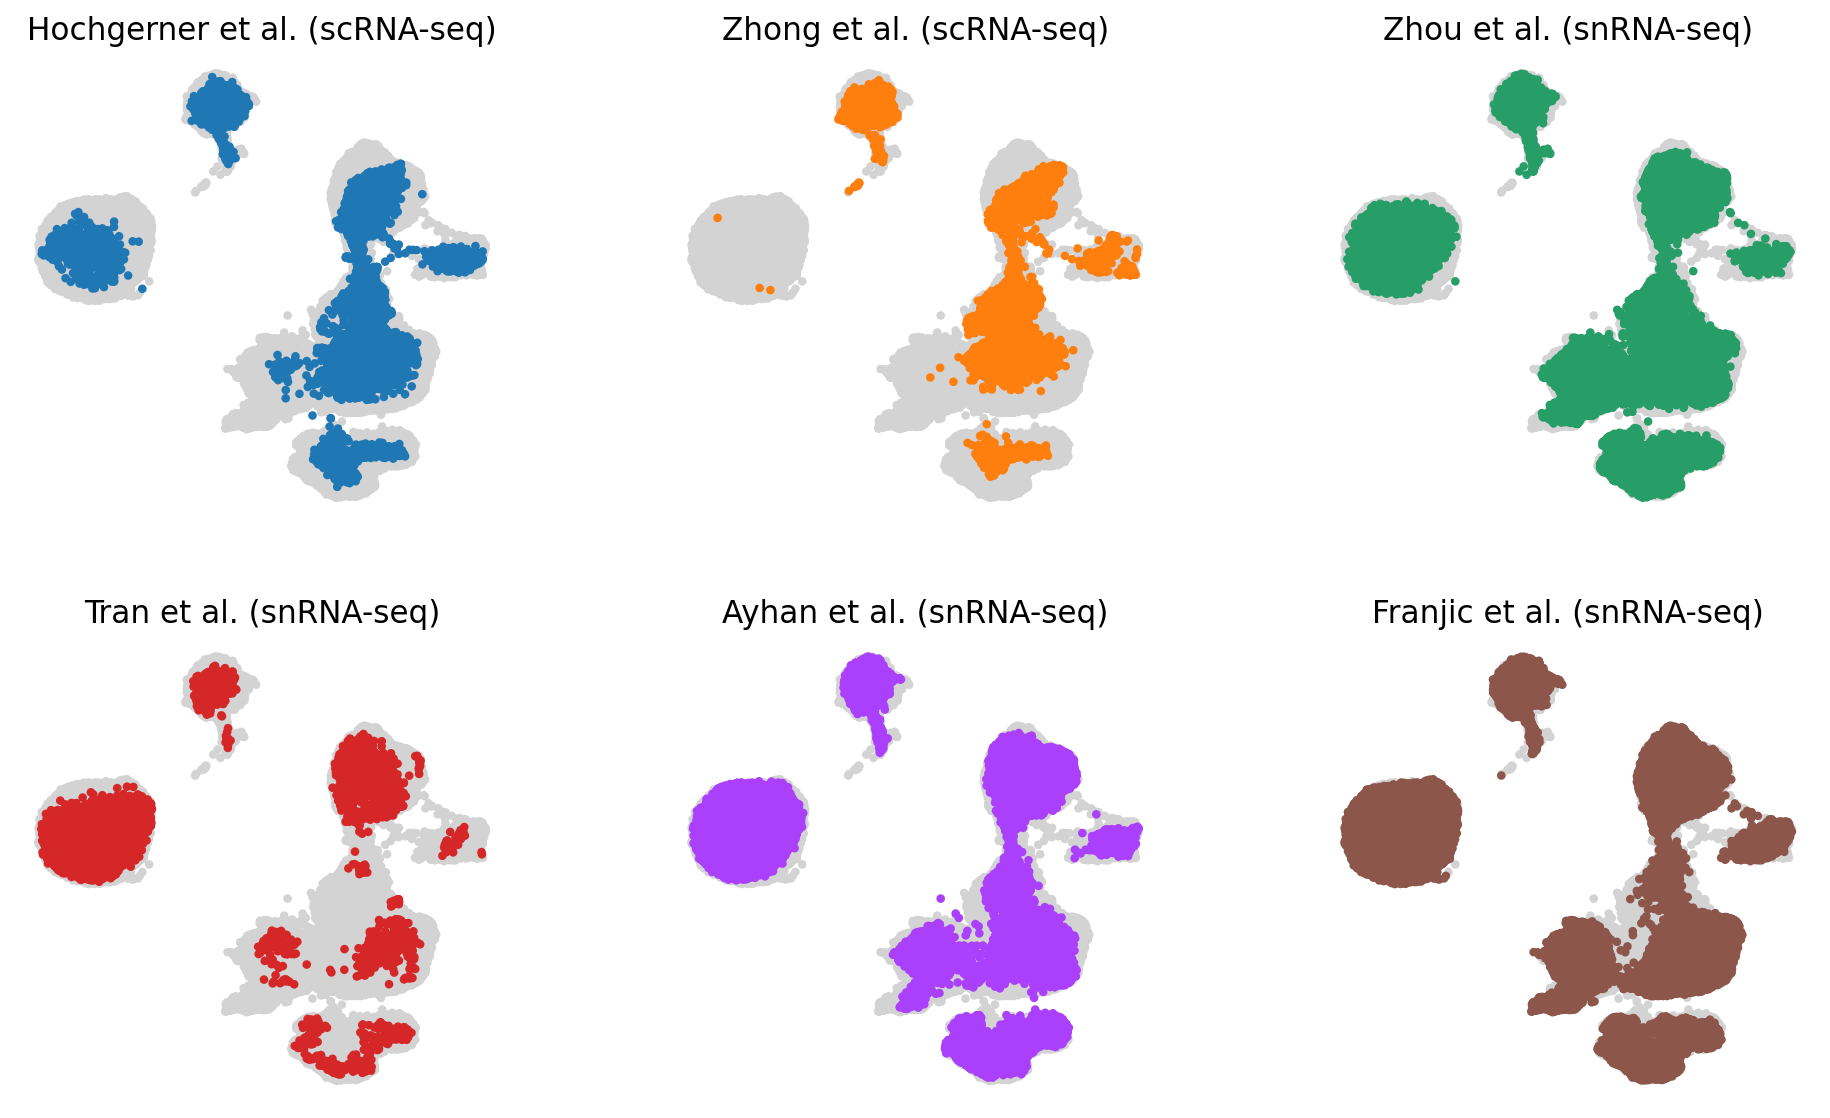

In [94]:
cluster_small_multiples(ad,'seq',ncols=3,save='seq.pdf')

## Meta info

In [54]:
ad.obs['donor_gender'][ad.obs['sample']=='sample13']='M'
ad.obs['donor_gender'][ad.obs['sample']=='sample1_plate1']='M'
ad.obs['donor_gender'][ad.obs['sample']=='sample1_plate2']='M'
ad.obs['donor_gender'][ad.obs['sample']=='sample15']='M'

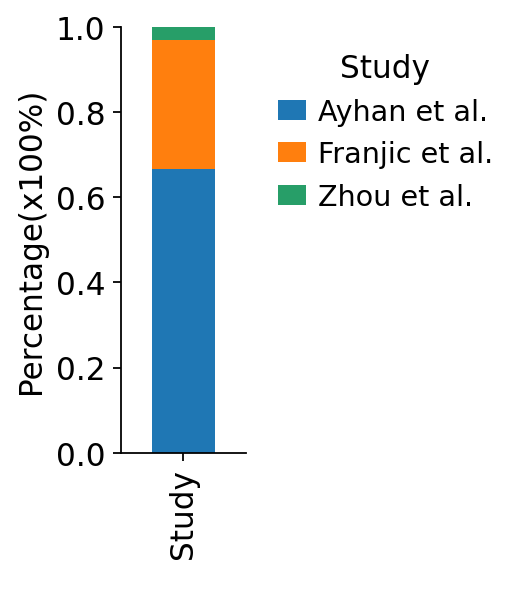

In [55]:
figsize(1,3.5)
tmp=pd.DataFrame(ad.obs['study'][(ad.obs.org=='human') & (ad.obs.stage=='Adult') & (ad.obs.anno=='NPC')].value_counts(normalize=True))
tmp=tmp[tmp['study']>0]
tmp['idx']=list(tmp.index)
tmp['name']='Study'


data_pivot = tmp.pivot(index='name', columns='idx', values='study')

# Plot stacked bar
data_pivot.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',frameon=False,handlelength=1,title='Study')
plt.grid(visible=False)
plt.ylabel('Percentage(x100%)')
plt.xlabel(' ')
plt.ylim(0,1)
plt.savefig('figures/fig4/NPC_info_study.pdf',dpi=300, bbox_inches='tight',transparent=True)

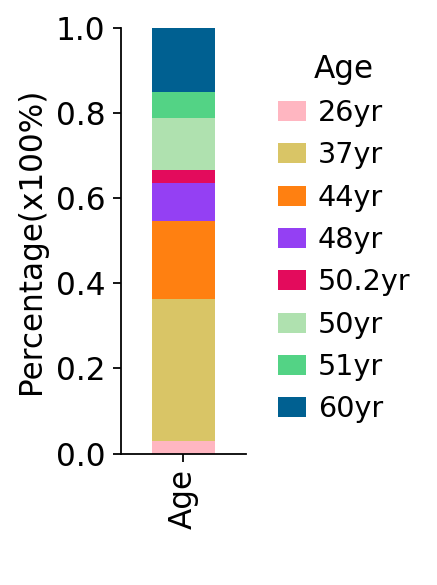

In [61]:
figsize(1,3.5)
tmp=pd.DataFrame(ad.obs['donor_age'][(ad.obs.org=='human') & (ad.obs.stage=='Adult') & (ad.obs.anno=='NPC')].value_counts(normalize=True))
tmp=tmp[tmp['donor_age']>0]
tmp['idx']=list(tmp.index)
tmp['name']='Age'


data_pivot = tmp.pivot(index='name', columns='idx', values='donor_age')

# Plot stacked bar
data_pivot.plot(kind='bar', stacked=True,color=['#FFB6C1', '#D9C566', '#FF8011', '#9440F3', '#E30B5C', '#AFE1AF', '#53D385', '#006091', '#74caff', '#5C89CC'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',frameon=False,handlelength=1,title='Age')
plt.grid(visible=False)
plt.ylabel('Percentage(x100%)')
plt.xlabel(' ')
plt.ylim(0,1)
plt.savefig('figures/fig4/NPC_info_age.pdf',dpi=300, bbox_inches='tight',transparent=True)

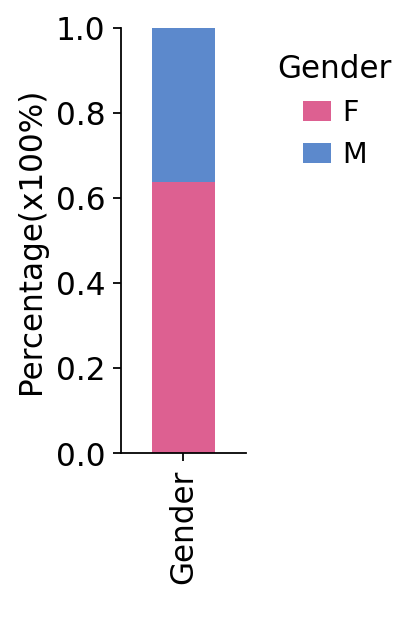

In [59]:
figsize(1,3.5)
tmp=pd.DataFrame(ad.obs['donor_gender'][(ad.obs.org=='human') & (ad.obs.stage=='Adult') & (ad.obs.anno=='NPC')].value_counts(normalize=True))
tmp=tmp[tmp['donor_gender']>0]
tmp['idx']=list(tmp.index)
tmp['name']='Gender'


data_pivot = tmp.pivot(index='name', columns='idx', values='donor_gender')

# Plot stacked bar
data_pivot.plot(kind='bar', stacked=True,color=["#DD6091", "#5C89CC"])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',frameon=False,handlelength=1,title='Gender')
plt.grid(visible=False)
plt.ylabel('Percentage(x100%)')
plt.xlabel(' ')
plt.ylim(0,1)
plt.savefig('figures/fig4/NPC_info_gender.pdf',dpi=300, bbox_inches='tight',transparent=True)

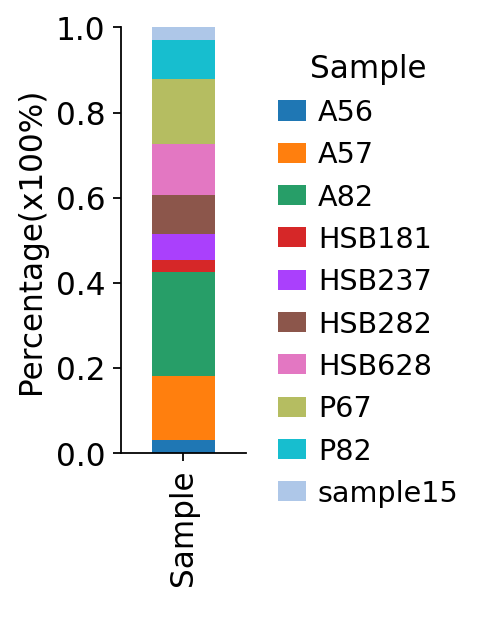

In [58]:
figsize(1,3.5)
tmp=pd.DataFrame(ad.obs['sample'][(ad.obs.org=='human') & (ad.obs.stage=='Adult') & (ad.obs.anno=='NPC')].value_counts(normalize=True))
tmp=tmp[tmp['sample']>0]
tmp['idx']=list(tmp.index)
tmp['name']='Sample'


data_pivot = tmp.pivot(index='name', columns='idx', values='sample')

# Plot stacked bar
data_pivot.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',frameon=False,handlelength=1,title='Sample')
plt.grid(visible=False)
plt.ylabel('Percentage(x100%)')
plt.xlabel(' ')
plt.ylim(0,1)
plt.savefig('figures/fig4/NPC_info_sample.pdf',dpi=300, bbox_inches='tight',transparent=True)

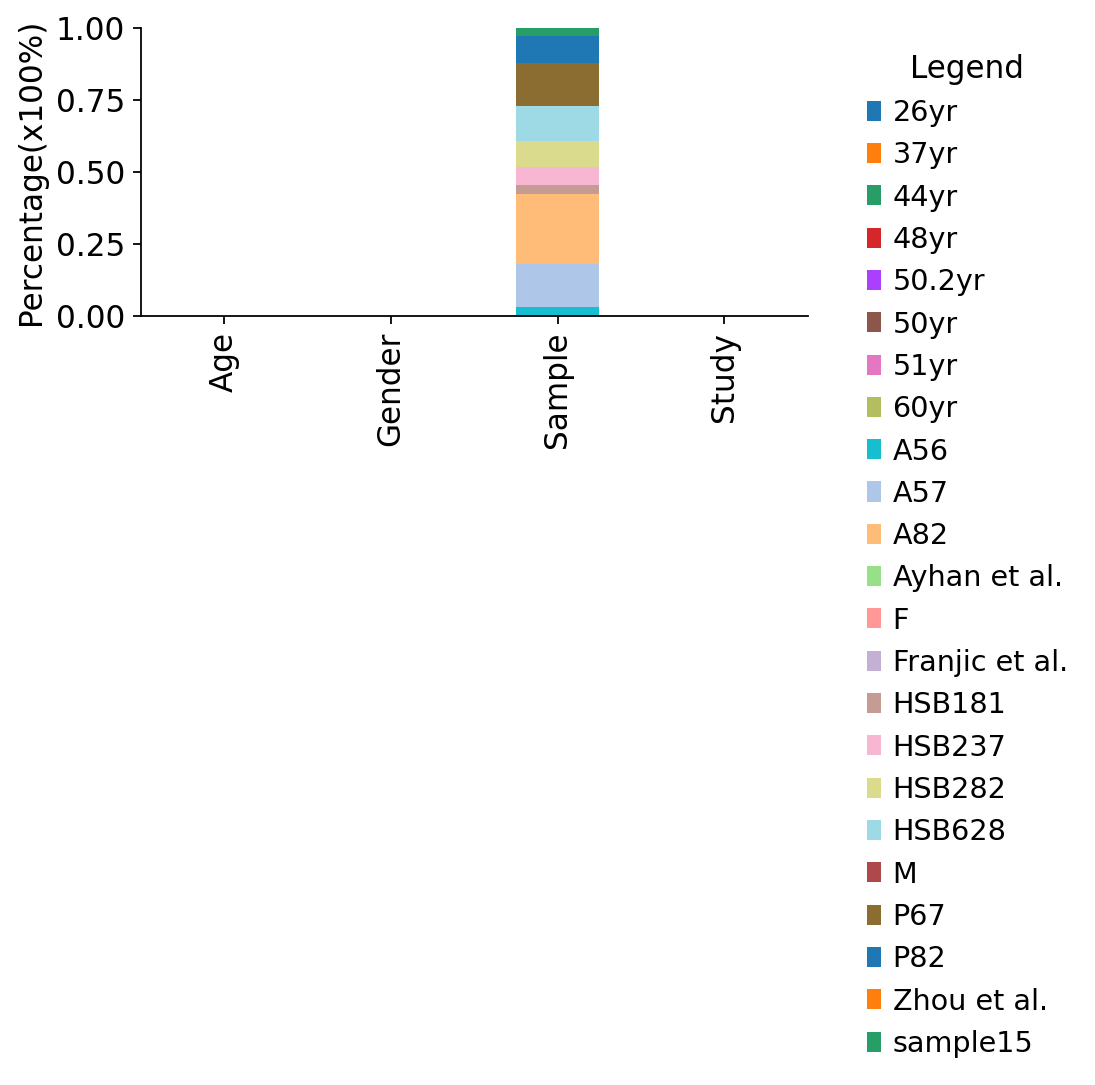

In [77]:
fig, ax = plt.subplots(figsize=(7, 5))

# Define colors for each plot
colors = [
    None,  # Default colors for the first plot
    ['#FFB6C1', '#D9C566', '#FF8011', '#9440F3', '#E30B5C', '#AFE1AF', '#53D385', '#006091', '#74caff', '#5C89CC'],  # Colors for the second plot
    ["#DD6091", "#5C89CC"],  # Colors for the third plot
    None  # Default colors for the fourth plot
]

titles = ['Study', 'Age', 'Gender', 'Sample']
fields = ['study', 'donor_age', 'donor_gender', 'sample']

# Create an empty DataFrame to store all data
all_data = pd.DataFrame()

for i, (title, field, color) in enumerate(zip(titles, fields, colors)):
    tmp = pd.DataFrame(ad.obs[field][(ad.obs.org=='human') & (ad.obs.stage=='Adult') & (ad.obs.anno=='NPC')].value_counts(normalize=True))
    tmp = tmp[tmp[field]>0]
    tmp['idx'] = list(tmp.index)
    tmp['name'] = title

    all_data = pd.concat([all_data, tmp])

# Pivot the combined DataFrame
data_pivot = all_data.pivot(index='name', columns='idx', values=field)

# Plot stacked bar
data_pivot.plot(kind='bar', stacked=True, ax=ax)
ax.grid(visible=False)
ax.set_ylabel('Percentage(x100%)')
ax.set_xlabel(' ')
ax.set_ylim(0,1)

# Move legend to the right
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False, title='Legend')

plt.tight_layout()
plt.savefig('figures/fig4/NPC_info_combined.pdf', dpi=300, bbox_inches='tight', transparent=True)

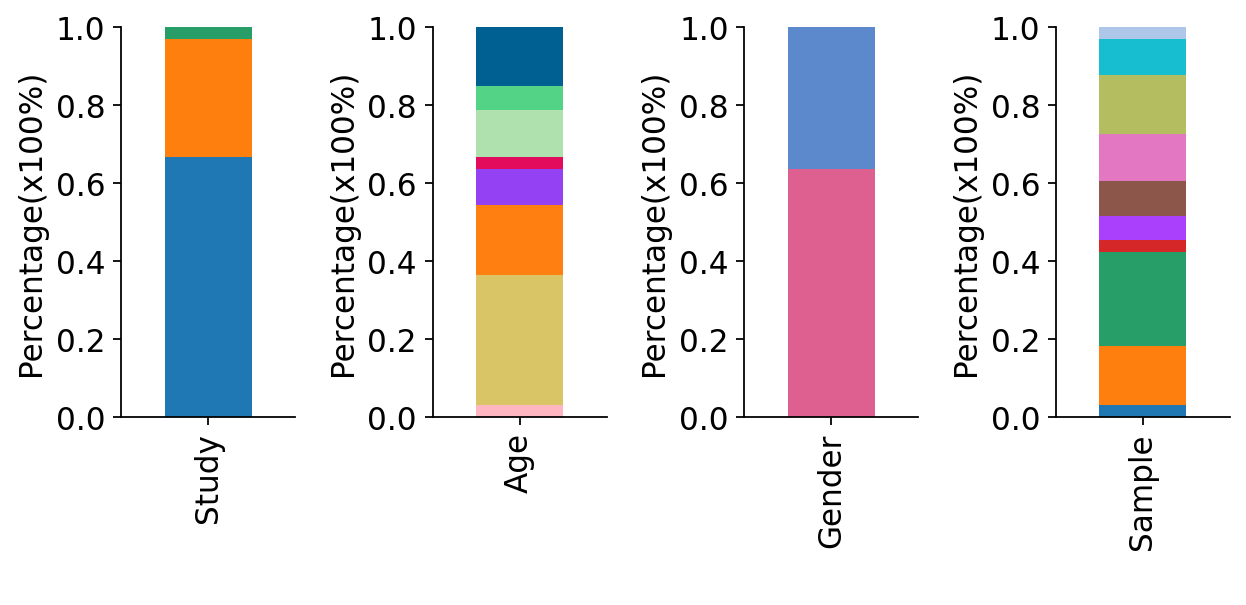

In [80]:
fig, axs = plt.subplots(1, 4, figsize=(8, 4))

# Define colors for each plot
colors = [
    None,  # Default colors for the first plot
    ['#FFB6C1', '#D9C566', '#FF8011', '#9440F3', '#E30B5C', '#AFE1AF', '#53D385', '#006091', '#74caff', '#5C89CC'],  # Colors for the second plot
    ["#DD6091", "#5C89CC"],  # Colors for the third plot
    None  # Default colors for the fourth plot
]

titles = ['Study', 'Age', 'Gender', 'Sample']
fields = ['study', 'donor_age', 'donor_gender', 'sample']
handles, labels = [], []

for i, (ax, title, field, color) in enumerate(zip(axs, titles, fields, colors)):
    tmp = pd.DataFrame(ad.obs[field][(ad.obs.org=='human') & (ad.obs.stage=='Adult') & (ad.obs.anno=='NPC')].value_counts(normalize=True))
    tmp = tmp[tmp[field]>0]
    tmp['idx'] = list(tmp.index)
    tmp['name'] = title

    data_pivot = tmp.pivot(index='name', columns='idx', values=field)

    # Plot stacked bar
    data_pivot.plot(kind='bar', stacked=True, color=color, ax=ax)
    ax.grid(visible=False)
    ax.set_ylabel('Percentage(x100%)')
    ax.set_xlabel(' ')
    ax.set_ylim(0,1)

    # Update handles and labels for legend
    h, l = ax.get_legend_handles_labels()
    handles += h
    labels += l

# Remove individual legends
for ax in axs:
    ax.get_legend().remove()

# Create a single legend on the right
#fig.legend(handles, labels, bbox_to_anchor=(1.05, 0.5), loc='center left', frameon=False, handlelength=1)

plt.tight_layout()
plt.savefig('figures/fig4/NPC_info_combined.pdf', dpi=300, bbox_inches='tight', transparent=True)

In [79]:
ad[(ad.obs.org=='human') & (ad.obs.stage=='Adult') & (ad.obs.anno=='NPC')].obs['sample'].value_counts().index

CategoricalIndex(['A82', 'A57', 'P67', 'HSB628', 'HSB282', 'P82', 'HSB237',
                  'A56', 'HSB181', 'sample15'],
                 categories=['A56', 'A57', 'A82', 'HSB181', 'HSB237', 'HSB282', 'HSB628', 'P67', ...], ordered=False, dtype='category')

In [82]:
ad.obs['sample']=ad.obs['sample'].replace({'A82':'S1', 
 'A57':'S2', 
 'P67':'S3', 
 'HSB628':'S4', 
 'HSB282':'S5', 
 'P82':'S6', 
 'HSB237':'S7',               
 'A56':'S8', 
 'HSB181':'S9', 
 'sample15':'S10'})

In [87]:
ad.obs['sample']=pd.Categorical(ad.obs['sample'], categories=['2M+1F', '3M+1F', 'A67', 'A76', 'F', 'HSB179', 'HSB231', 'M',
       'P56', 'P57', 'P76', 'R1.08May2019', 'R2.23Jul2019',
       'R3.04Sep2019', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7',
       'S8', 'S9','S10', 'Unclassified', 'sample13', 'sample14',
       'sample16_plate1', 'sample16_plate2', 'sample17', 'sample1_plate1',
       'sample1_plate2', 'sample2', 'sample3', 'sample4', 'sample5',
       'sample6_plate1', 'sample6_plate2', 'sample7_plate1',
       'sample7_plate2', 'sample8'], ordered=True)

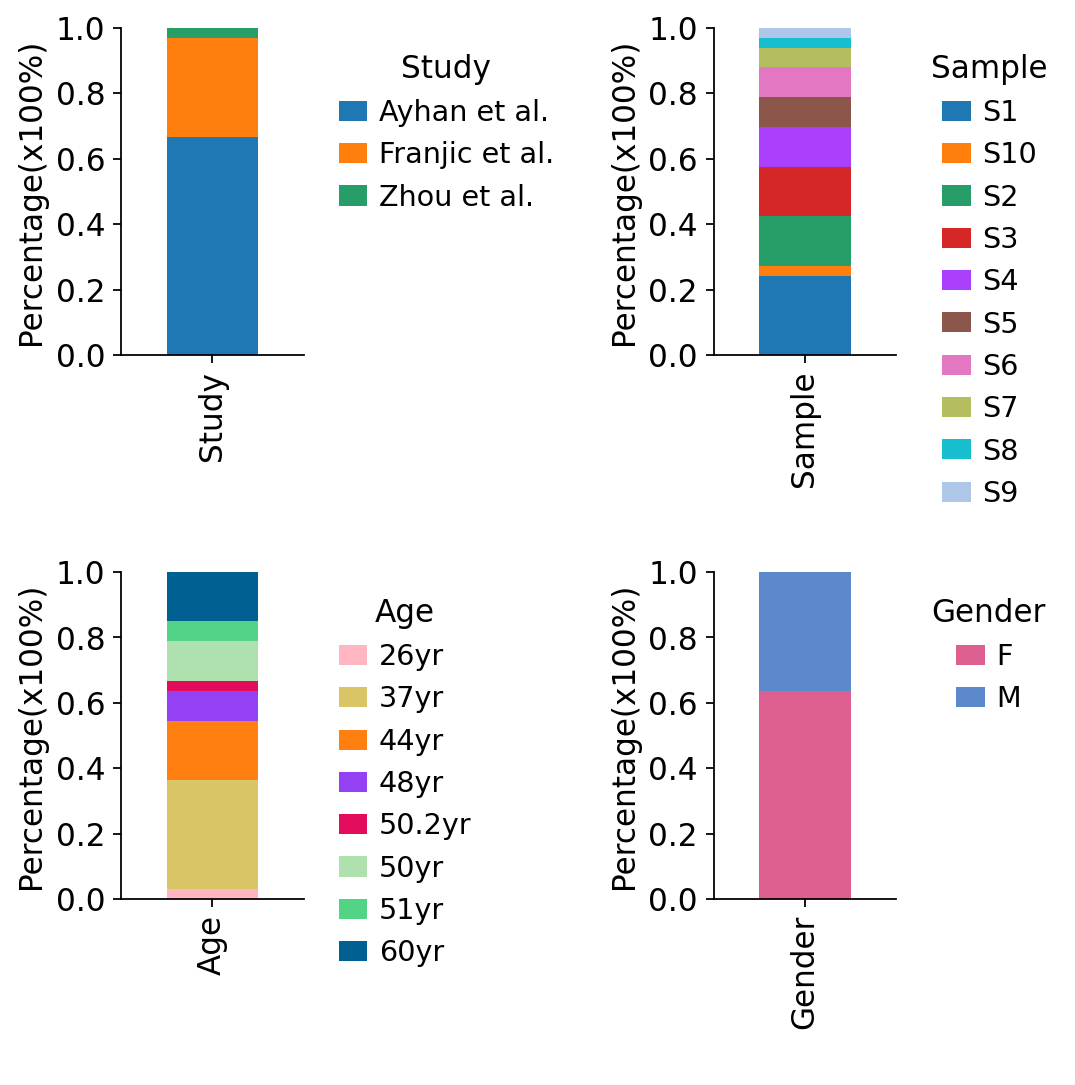

In [88]:
fig, axs = plt.subplots(2, 2, figsize=(7, 7))

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Define colors for each plot
colors = [
    None,  # Default colors for the first plot
     None,  # Default colors for the fourth plot
    ['#FFB6C1', '#D9C566', '#FF8011', '#9440F3', '#E30B5C', '#AFE1AF', '#53D385', '#006091', '#74caff', '#5C89CC'],  # Colors for the second plot
    ["#DD6091", "#5C89CC"]  # Colors for the third plot
]

titles = ['Study','Sample', 'Age', 'Gender']
fields = ['study', 'sample', 'donor_age', 'donor_gender']

for i, (ax, title, field, color) in enumerate(zip(axs, titles, fields, colors)):
    tmp = pd.DataFrame(ad.obs[field][(ad.obs.org=='human') & (ad.obs.stage=='Adult') & (ad.obs.anno=='NPC')].value_counts(normalize=True))
    tmp = tmp[tmp[field]>0]
    tmp['idx'] = list(tmp.index)
    tmp['name'] = title

    data_pivot = tmp.pivot(index='name', columns='idx', values=field)

    # Plot stacked bar
    data_pivot.plot(kind='bar', stacked=True, color=color, ax=ax)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False, handlelength=1, title=title)
    ax.grid(visible=False)
    ax.set_ylabel('Percentage(x100%)')
    ax.set_xlabel(' ')
    ax.set_ylim(0,1)

plt.tight_layout()
plt.savefig('figures/fig4/NPC_info_combined1.pdf', dpi=300, bbox_inches='tight', transparent=True)

In [384]:
ad.obs[['sample','donor_gender']][ad.obs['study']=='Zhou et al.'].value_counts()

sample           donor_gender
sample13         M               8753
sample1_plate1   M               5521
sample7_plate1   M               5207
sample7_plate2   M               5004
sample15         M               4605
sample1_plate2   M               3787
sample16_plate1  M               3270
sample16_plate2  M               3230
sample17         F               2785
sample5          F               1851
sample14         M               1841
sample3          F               1824
sample2          M               1561
sample4          M               1174
sample8          F               1109
sample6_plate2   M               1106
sample6_plate1   M               1102
dtype: int64

In [382]:
ad.obs[['sample','donor_gender']][ad.obs['study']=='Ayhan et al.'].value_counts()

sample  donor_gender
P76     M               20222
P82     F               19258
A76     M               14669
A82     F               14521
A57     F               11234
P67     M                5566
P57     F                4604
A56     F                4026
A67     M                3292
P56     F                2148
dtype: int64

In [383]:
ad.obs[['sample','donor_gender']][ad.obs['study']=='Franjic et al.'].value_counts()

sample  donor_gender
HSB282  M               40086
HSB179  M               35770
HSB181  M               27221
HSB237  M               21688
HSB231  F               20738
HSB628  F               20264
dtype: int64

In [386]:
ad.obs[['sample','donor_gender']][ad.obs['study']=='Tran et al.'].value_counts()

sample        donor_gender
R1.08May2019  M               3607
R3.04Sep2019  M               3255
R2.23Jul2019  M               1597
dtype: int64

In [387]:
ad.obs[['sample','donor_gender']][ad.obs['study']=='Zhong et al.'].value_counts()

Series([], dtype: int64)

In [388]:
ad.obs[['sample','donor_gender']][ad.obs['study']=='Hochgerner et al.'].value_counts()

Series([], dtype: int64)

In [390]:
9+4+4+3

20

In [389]:
4+6+2

12

In [385]:
ad.obs['study'].value_counts()

Franjic et al.       165767
Ayhan et al.          99540
Zhou et al.           53730
Zhong et al.          26604
Hochgerner et al.     17751
Tran et al.            8459
Name: study, dtype: int64

## save

In [401]:
del ad.layers['scale']

In [411]:
ad1=sc.AnnData(X=ad.X.copy(),obs=ad.obs.copy(),var=ad.var.copy())

In [412]:
ad1.uns=ad.uns

In [413]:
ad1.obsm=ad.obsm
#ad1.varm=ad.varm
#ad1.obsp=ad.obsp

In [414]:
ad1.write_h5ad('data/hipngs/hm3f4a_noBr_hip_integration_fig4_R.h5ad')

In [8]:
ad1=sc.read('data/hipngs/hm3f4a_noBr_hip_integration_fig4_R.h5ad')

In [9]:
sc.set_figure_params(scanpy=True, fontsize=14,facecolor=None,frameon=False,transparent=True)
mpl.rcParams['axes.spines.top'] = True
mpl.rcParams['axes.spines.right'] = True
mpl.rcParams['axes.grid'] = False

In [10]:
genes = ["FABP7", "NES", "ASCL1", "LRRK2", "SOX2", "GFAP", "HOPX", "ID4", "PROM1", "EOMES", "PBK", "PAX6", "CKAP2L", "PROX1"]

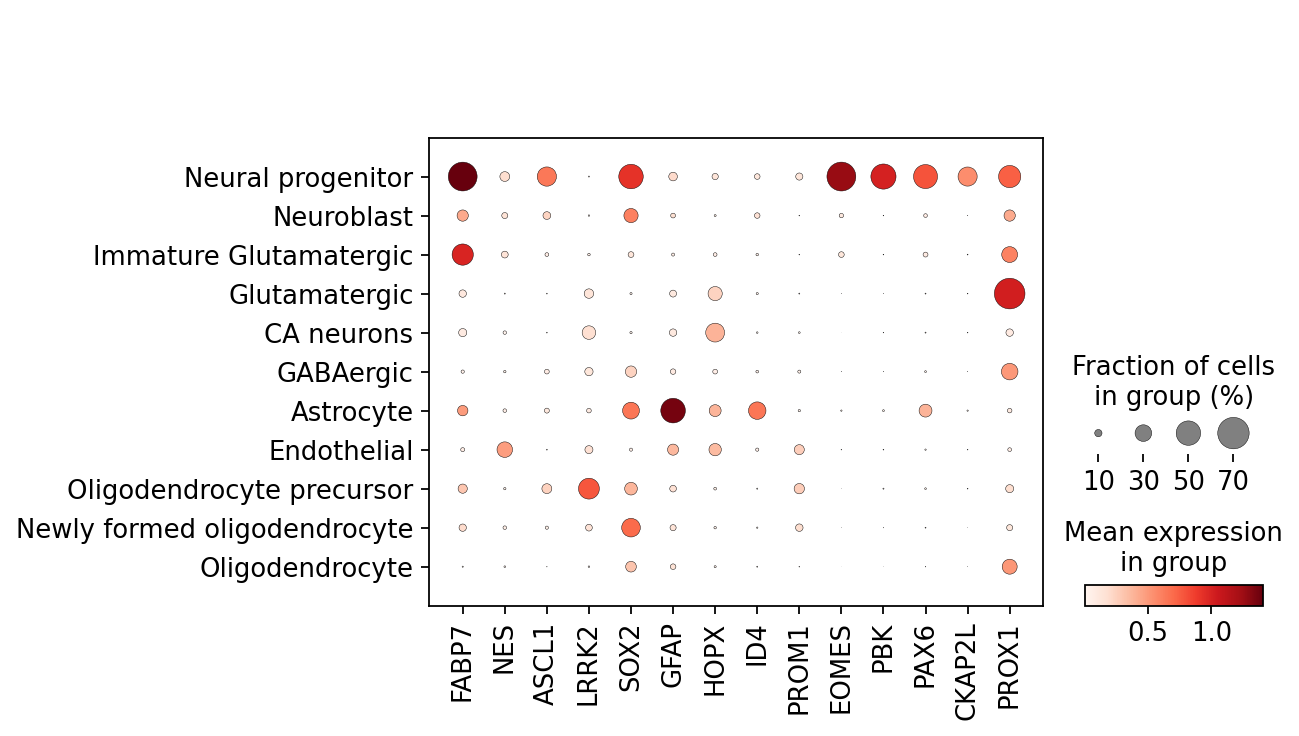

In [12]:
sc.pl.dotplot(ad1,genes,'anno1')#,save='fig4_marker_dotplot.pdf')

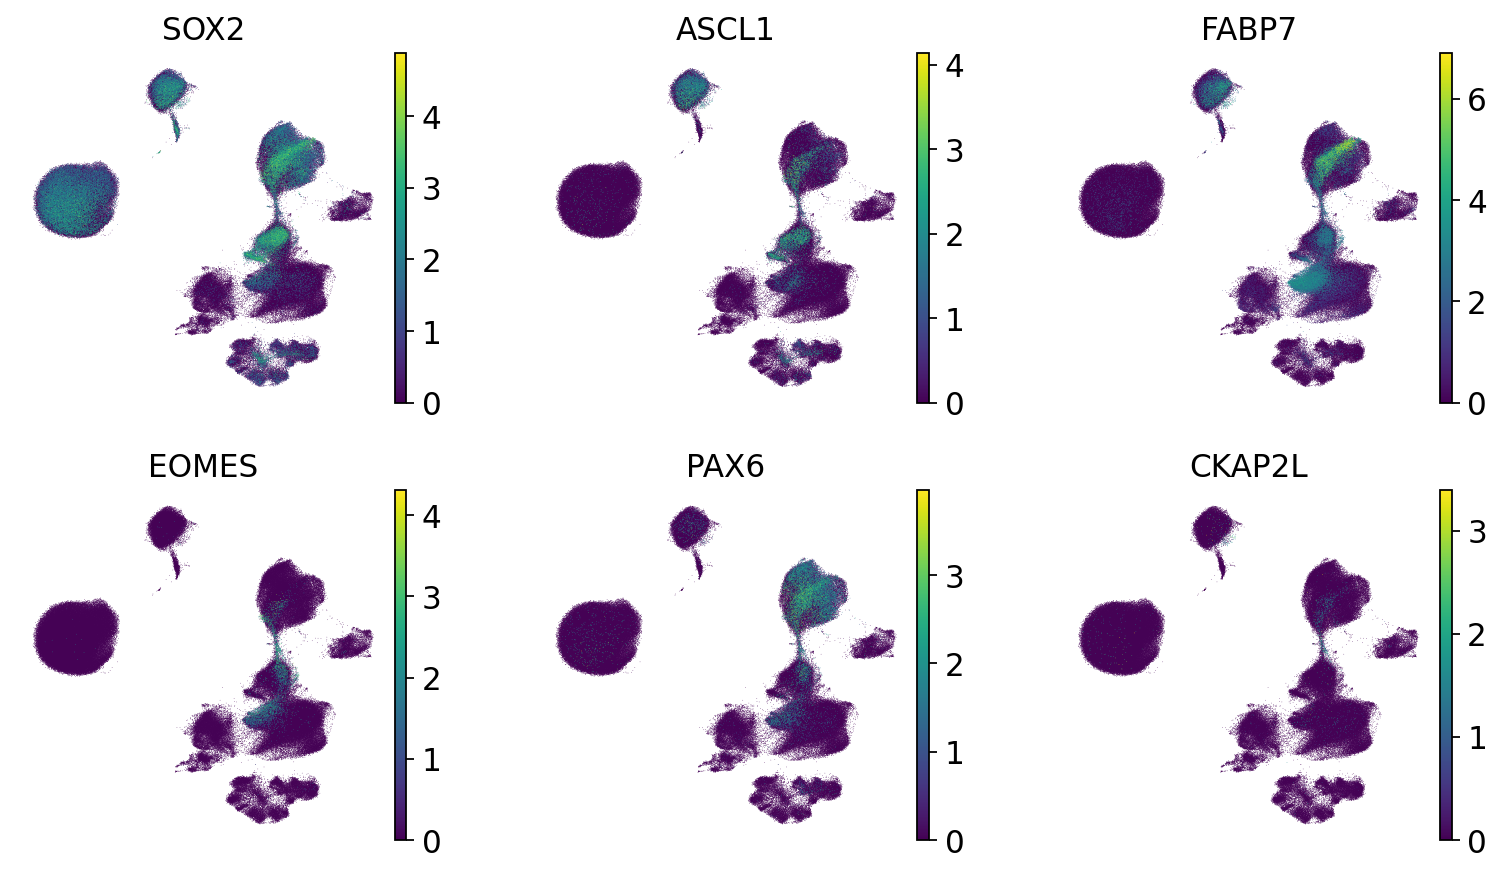

In [16]:
figsize(3,3)
sc.pl.umap(ad1, color=["SOX2", "ASCL1", "FABP7",  "EOMES", "PAX6", "CKAP2L"], ncols=3,frameon=False,save='sfig6_marker_umap.pdf')

In [ ]:
library(SingleR)
library(SingleCellExperiment)
library(sceasy)
library(Seurat)
library(dplyr)

run_SingleR<-function(obsRef,expRef,obsPred,expPred){
    
    commonGenes = intersect(rownames(expRef), rownames(expPred))
    print(sprintf("number of common genes: %d",length(commonGenes)))
    expRef = expRef[commonGenes,]
    obsRef<-data.frame(cell=obsRef, x = obsRef)
    rownames(obsRef)<-colnames(expRef)
    obsTrain<-droplevels(obsRef)
    # obsList <- splitCommon(sampTab=obsRef, ncells=100, dLevel="cell")
    # obsTrain = obsList[[1]]
    expTrain = expRef
    logTrain = normals(expTrain) ## log-normalized

    expPred = expPred[commonGenes,]
    logPred = normals(expPred) ## log-normalized

    sceTrain <- SingleCellExperiment(
            assays = list(
                counts = (expTrain),
                logcounts = logTrain
            ), 
            colData = obsTrain
        )

    scePred <- SingleCellExperiment(
            assays = list(
                counts = (expPred),
                logcounts = logPred
            ), 
            colData = obsPred
        )

    t0<-system.time(prediction <- SingleR(test = scePred, ref = sceTrain, labels = obsTrain$cell))
    print(t0)
    return(prediction)
}

normals = function(data) {
    obj = CreateSeuratObject(data) %>% NormalizeData()
    return(obj[["RNA"]]@data)
}

ad = convertFormat('/home/huang_yin/projA/data/hipngs/hm3f4a_noBr_hip_integration_rmPyr_Micro_qc1_reference.h5ad',from='anndata',to='seurat',outFile=NULL)
obsRef<-ad@meta.data
expRef<-ad[["RNA"]]@counts
obsRef<-obsRef[,"cellType"]

ad = convertFormat("/home/huang_yin/projA/data/hipngs/hm3f4a_noBr_hip_integration_rmPyr_Micro_qc1_target.h5ad", from="anndata", to="seurat", outFile=NULL)
obsPred<-ad@meta.data                                           
expPred<-ad[["RNA"]]@counts
# rownames(expPred) = make.unique(rownames(expPred))
obsPred<-rep('UNK',dim(expPred)[2])

x<-run_SingleR(obsRef,expRef,obsPred,expPred)
write.csv(x,'~/projA/gsim/nbs/data/results/hm3f4a_noBr_hip_integration_rmPyr_Micro_qc1_cellType_SingleR.csv')

## Machine learning models

In [113]:
from SCCAF import *

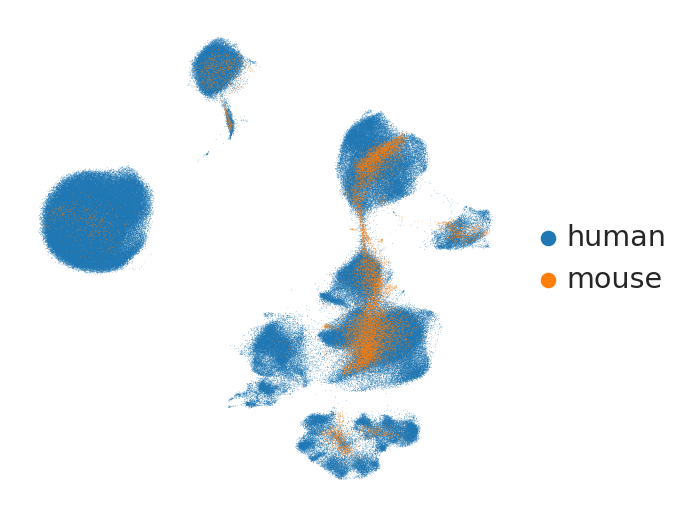

In [116]:
figsize(4,4)
sc.pl.umap(ad,color=['org'],frameon=False,title='',save='umap_cross_species.pdf')

In [119]:
ad.obs['org']=ad.obs['org'].cat.set_categories(['mouse', 'human'], ordered=True)

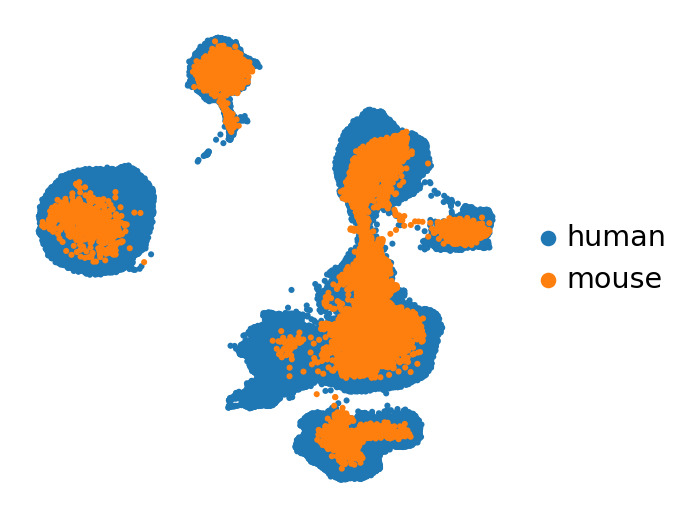

In [100]:
figsize(4,4)
sc.pl.umap(ad,color=['org'],frameon=False,title='',size=30,save='umap_cross_species_1.pdf')

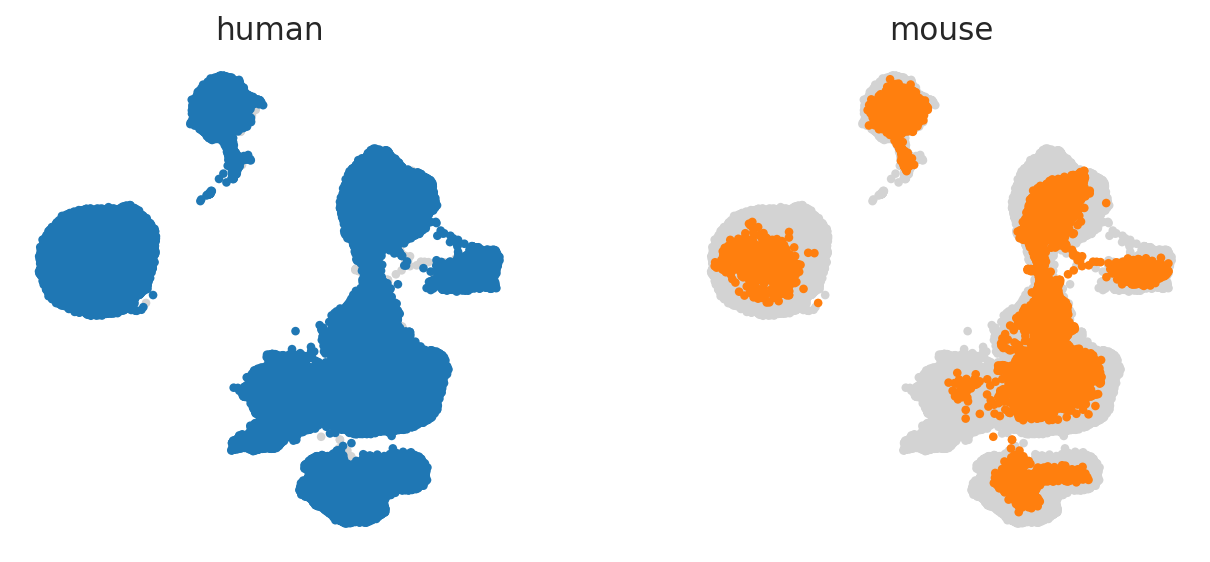

In [117]:
cluster_small_multiples(ad,'org')

In [101]:
def plot_NPC(adata, clust_key,clusters,name,color='#DD6091',size=10, frameon=False, legend_loc=None,**kwargs):
        # Create a copy of the AnnData object
    tmp = adata.copy()
    tmp.obs[name] = adata.obs[clust_key].isin(clusters).astype("category")
    tmp.uns[name + "_colors"] = ["#d3d3d3", color]
        
    sc.pl.umap(
        tmp,
        color= name, 
        size=size,
        frameon=frameon,
        legend_loc=legend_loc,
        **kwargs,
    )

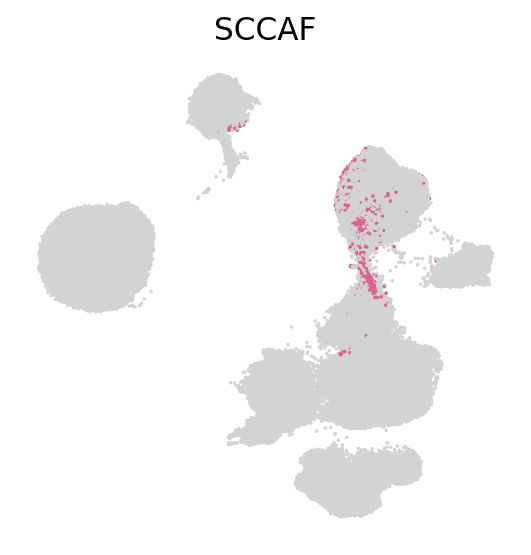

In [103]:
plot_NPC(ad1,'predict',['NPC'],'SCCAF',save='SCCAF.pdf')

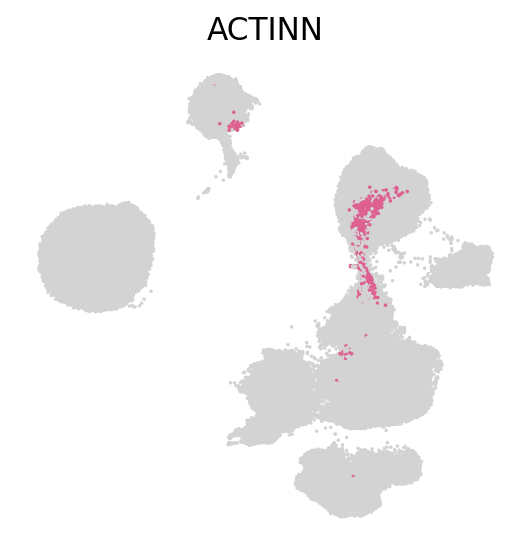

In [104]:
plot_NPC(ad1,'predict_ACTINN',['nIPC','nIPC-perin'],'ACTINN',save='ACTINN.pdf')

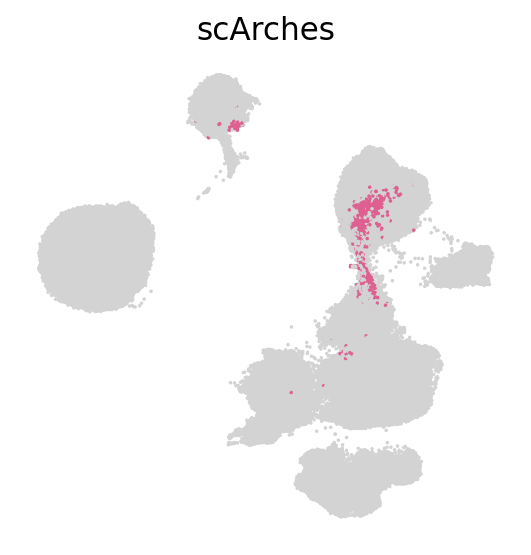

In [105]:
plot_NPC(ad1,'predict_scArches',['nIPC','nIPC-perin'],'scArches',save='scArches.pdf')

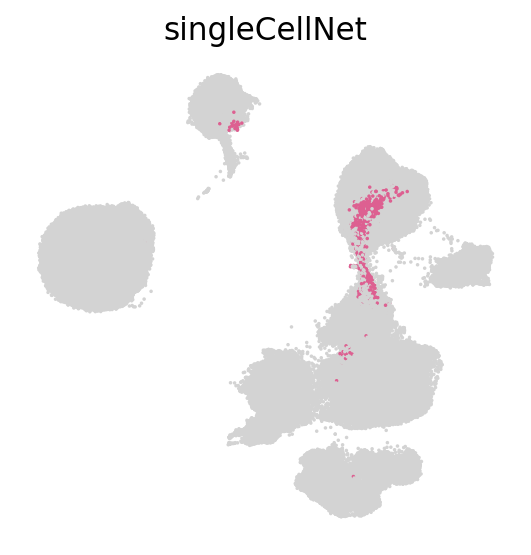

In [107]:
plot_NPC(ad1,'hvgpred_singleCellNet',['nIPC','nIPC-perin'],'singleCellNet',save='singleCellNet.pdf')

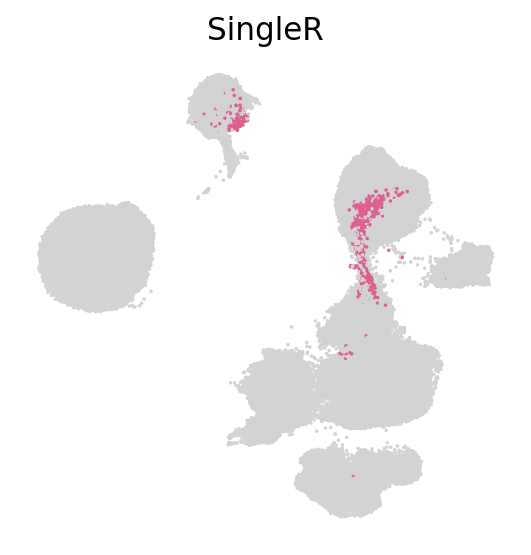

In [110]:
plot_NPC(ad1,'hvgpred_SingleR',['nIPC','nIPC-perin'],'SingleR',save='SingleR.pdf')

## edgeR DEGs with donor_ID as the covariate

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from adjustText import adjust_text

def enhanced_volcano(toptable, x, y, lab, pCutoff = 0.05, FCcutoff = 1, pointSize = 5, 
                     colors = {"sig": "red", "not sig": "blue"}, selectLab = None, xlim = None):
    assert pd.api.types.is_numeric_dtype(toptable[x]), f"{x} is not numeric!"
    assert pd.api.types.is_numeric_dtype(toptable[y]), f"{y} is not numeric!"

    toptable = toptable.copy()
    toptable['Significance'] = np.where((abs(toptable[x]) > FCcutoff) & (toptable[y] < pCutoff), 'sig', 'not sig')
    toptable['-log10(p-value)'] = -np.log10(toptable[y])
    toptable.loc[toptable[y] == 0, y] = 1e-10

    # Create the scatterplot
    sns.scatterplot(data=toptable, x=x, y='-log10(p-value)', hue='Significance', palette=colors, s=pointSize, edgecolor=None)

    # Draw a vertical line at FCcutoff
    plt.axvline(x=FCcutoff, color='black', linestyle='--')
    plt.axvline(x=-FCcutoff, color='black', linestyle='--')

    # Draw a horizontal line at pCutoff
    plt.axhline(y=-np.log10(pCutoff), color='black', linestyle='--')

    texts = []
    if selectLab is not None:
        for i in range(toptable.shape[0]):
            if toptable[lab].iloc[i] in selectLab:
                # Only annotate points that are significant
                if toptable['Significance'].iloc[i] == 'sig':
                    texts.append(plt.text(toptable[x].iloc[i], toptable['-log10(p-value)'].iloc[i], toptable[lab].iloc[i]))

    # Optimize text placement to minimize overlaps
    adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black'), ax=plt.gca())
    #adjust_text(texts, ax=plt.gca())

    # Set x-axis limits
    if xlim is not None:
        plt.xlim(xlim)

    # Add title and labels
    plt.title(' ')
    plt.xlabel('Log2 fold change')
    plt.ylabel('-Log10 p-value')

    # Remove the legend
    plt.legend().remove()

In [4]:
deg = pd.read_csv('./results/npc_rmdonor_DEG.csv', index_col=0)
deg

gene         logFC     logCPM          LR        PValue  \
1       APOLD1  6.239933e+00   8.388670  139.026191  4.346788e-32   
2        TOP2A  6.972844e+00   6.631024  117.766025  1.950968e-27   
3        CENPF  7.238083e+00   6.620236  114.476763  1.024599e-26   
4         EZH2  4.683038e+00   7.212769   98.800983  2.791958e-23   
5         SYT1 -6.403535e+00  11.968168   97.169186  6.364954e-23   
...        ...           ...        ...         ...           ...   
10380  ARHGAP8 -1.016542e-16   5.369877    0.000000  1.000000e+00   
10381    UPK3A -1.016542e-16   5.369877    0.000000  1.000000e+00   
10382    SYCE3 -1.016542e-16   5.369877    0.000000  1.000000e+00   
10383    CPT1B -1.016542e-16   5.369877    0.000000  1.000000e+00   
10384  RIPPLY3 -1.016542e-16   5.369877    0.000000  1.000000e+00   

                FDR  
1      4.513704e-28  
2      1.012942e-23  
3      3.546478e-23  
4      7.247923e-20  
5      1.321874e-19  
...             ...  
10380  1.000000e+00  
10381  1.000000e+00  
10382  1.000000e+00  
10383  1.000000e+00  
10384  1.000000e+00  

[10384 rows x 6 columns]

In [5]:
import matplotlib as mpl
import scanpy as sc
sc.set_figure_params(scanpy=True, fontsize=14,facecolor=None,frameon=False,transparent=True)
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.grid'] = False

/home/centos/mambaforge/envs/sc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/centos/mambaforge/envs/sc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/centos/mambaforge/envs/sc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/centos/mambaforge/envs/sc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

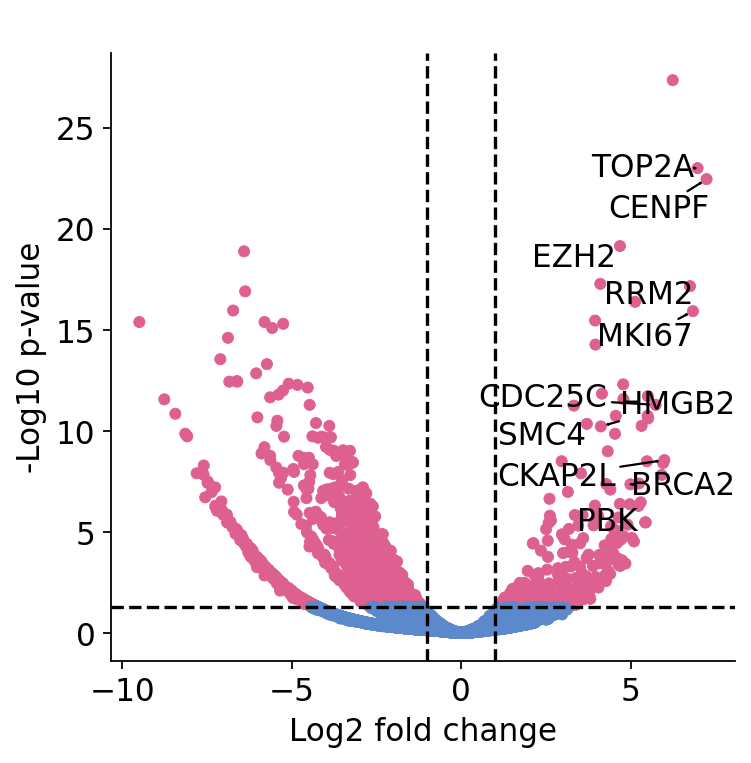

In [7]:
figsize(5, 5)
np.random.seed(0)
enhanced_volcano(deg,lab = 'gene',
    selectLab = ['TOP2A',
 'MKI67','RRM2','BRCA2', 'CENPF','CDC25C','PBK','EZH2','CKAP2L',
  'SMC4','HMGB2'],
    x = 'logFC',
    y = 'FDR',FCcutoff =1,colors={"sig": "#DD6091", "not sig": "#5C89CC"},pointSize=25)
plt.savefig('results/npc_Libra_edgeR_LRT_de.pdf',dpi=300, bbox_inches='tight',transparent=True)

## GO analysis

In [ ]:
npc_Libra_edgeR_LRT_de = read.csv('results/npc_rmdonor_DEG.csv')
npc_Libra_edgeR_LRT_de = npc_Libra_edgeR_LRT_de %>% filter((avg_logFC) > 1, p_val_adj < 0.05)

In [ ]:
npc_Seurat_de = read.csv('results/npc_Seurat_de.csv')
npc_Seurat_de = npc_Seurat_de %>% filter((avg_log2FC) > 0.5, p_val_adj < 0.05)

In [17]:
myEnrich <- function(genes, type) {
    entre <- AnnotationDbi::select(org.Hs.eg.db,
       keys = genes,
       columns = c("ENTREZID", "SYMBOL"),
       keytype = "SYMBOL")

    entre <- entre %>% 
      ## 去掉NA
      filter(ENTREZID!="NA") %>% 
      ## 去掉重复
      distinct(ENTREZID)
    
    for (i in c("CC","BP","MF")) {
      ego = enrichGO(gene = entre$ENTREZID,
                     # universe = names(geneList), #背景基因集
                     OrgDb = org.Hs.eg.db, #没有organism="human"，改为OrgDb=org.Hs.eg.db
                     #keytype = 'ENSEMBL',
                     ont = i, #也可以是 CC  BP  MF中的一种
                     pAdjustMethod = "BH", #矫正方式 holm”, “hochberg”, “hommel”, “bonferroni”, “BH”, “BY”, “fdr”, “none”中的一种
                     pvalueCutoff = 1, #P值会过滤掉很多，可以全部输出
                     qvalueCutoff = 1,
                     readable = TRUE) #Gene ID 转成gene Symbol ，易读
      # p = dotplot(ego,title=paste0("alldiffgene GO ",i))#点图，按富集的数从大到小的
      # pdf(paste0("alldiffgene_GO_",i,"_dot.pdf"),width = 10, height = 7)
      # print(p)
      # dev.off()
      
      # p = barplot(ego, showCategory=20,title=paste0("alldiffgene GO ",i))#条状图，按p从小到大排，绘制前20个Term
      # pdf(paste0("alldiffgene_GO_",i,"_bar.pdf"),width = 10, height = 7)
      # print(p)
      # dev.off()
        write.csv(as.data.frame(ego), file = paste0("results/Enrichment/GO_",i,"_",type,".csv"))
    }
    
    kegg <- enrichKEGG(gene = entre$ENTREZID,
                       organism = 'hsa', #KEGG可以用organism = 'hsa'
                       pvalueCutoff = 1, qvalueCutoff = 1)
    # write.csv(summary(kegg),"alldiffgene_kegg.csv",row.names =FALSE)
    write.csv(summary(kegg), file = paste0("results/Enrichment/kegg_",type,".csv"))
    # pdf(paste0("alldiffgene_KEGG_dot.pdf"),width = 10, height = 7)
    # dotplot(kegg,title="alldiffgene KEGG")
    # dev.off()
    
    # pdf(paste0("alldiffgene_EnrichmentKEGG_bar.pdf"),width = 10, height = 7)
    # barplot(kegg,title="alldiffgene KEGG")
    # dev.off()
}

In [7]:
ls()

[1] "myEnrich"               "npc_Libra_edgeR_LRT_de" "npc_Seurat_de"         
[4] "package_list"

## Enrichment

In [8]:
intergenes = intersect(npc_Libra_edgeR_LRT_de$gene, npc_Seurat_de$X)

In [18]:
myEnrich(npc_Libra_edgeR_LRT_de$gene, 'edgeR')
myEnrich(npc_Seurat_de$X, 'Seurat')
myEnrich(intergenes, 'Intersection')

'select()' returned 1:1 mapping between keys and columns

Warning message in summary(kegg):
“summary method to convert the object to data.frame is deprecated, please use as.data.frame instead.”
'select()' returned 1:1 mapping between keys and columns

Warning message in summary(kegg):
“summary method to convert the object to data.frame is deprecated, please use as.data.frame instead.”
'select()' returned 1:1 mapping between keys and columns

Warning message in summary(kegg):
“summary method to convert the object to data.frame is deprecated, please use as.data.frame instead.”


In [2]:
edgeR = pd.read_csv('results/Enrichment/GO_BP_edgeR.csv', index_col=1)
edgeR['Celltype'] = 'edgeR'
edgeR

Unnamed: 0                                        Description  \
ID                                                                          
GO:0007059  GO:0007059                             chromosome segregation   
GO:0000280  GO:0000280                                   nuclear division   
GO:0048285  GO:0048285                                  organelle fission   
GO:0140014  GO:0140014                           mitotic nuclear division   
GO:0000070  GO:0000070               mitotic sister chromatid segregation   
...                ...                                                ...   
GO:0034249  GO:0034249     negative regulation of amide metabolic process   
GO:0008380  GO:0008380                                       RNA splicing   
GO:0031331  GO:0031331  positive regulation of cellular catabolic process   
GO:0034470  GO:0034470                                   ncRNA processing   
GO:0007608  GO:0007608                        sensory perception of smell   

           GeneRatio    BgRatio        pvalue      p.adjust        qvalue  \
ID                                                                          
GO:0007059    65/314  424/18870  7.519635e-44  2.526597e-40  2.172779e-40   
GO:0000280    61/314  441/18870  2.073264e-38  3.483084e-35  2.995322e-35   
GO:0048285    63/314  488/18870  7.349806e-38  8.231783e-35  7.079024e-35   
GO:0140014    50/314  274/18870  1.882749e-37  1.581509e-34  1.360038e-34   
GO:0000070    43/314  184/18870  4.359239e-37  2.929409e-34  2.519182e-34   
...              ...        ...           ...           ...           ...   
GO:0034249     1/314  345/18870  9.971000e-01  9.981372e-01  8.583605e-01   
GO:0008380     2/314  478/18870  9.972460e-01  9.981372e-01  8.583605e-01   
GO:0031331     1/314  396/18870  9.987887e-01  9.993836e-01  8.594323e-01   
GO:0034470     1/314  439/18870  9.994209e-01  9.995677e-01  8.595906e-01   
GO:0007608     1/314  456/18870  9.995677e-01  9.995677e-01  8.595906e-01   

                                                       geneID  Count Celltype  
ID                                                                             
GO:0007059  TOP2A/CENPF/MKI67/ASPM/SMC4/TPX2/CENPE/NCAPG/K...     65    edgeR  
GO:0000280  TOP2A/CENPF/MKI67/ASPM/SMC4/CDC25C/TPX2/CENPE/...     61    edgeR  
GO:0048285  TOP2A/CENPF/MKI67/ASPM/SMC4/CDC25C/TPX2/CENPE/...     63    edgeR  
GO:0140014  CENPF/MKI67/SMC4/CDC25C/TPX2/CENPE/NCAPG/KIF14...     50    edgeR  
GO:0000070  CENPF/SMC4/TPX2/CENPE/NCAPG/KIF14/KIF18B/CENPK...     43    edgeR  
...                                                       ...    ...      ...  
GO:0034249                                               TYMS      1    edgeR  
GO:0008380                                           TTF2/FUS      2    edgeR  
GO:0031331                                              LRRK2      1    edgeR  
GO:0034470                                               DKC1      1    edgeR  
GO:0007608                                                B2M      1    edgeR  

[3360 rows x 10 columns]

In [3]:
seurat = pd.read_csv('results/Enrichment/GO_BP_Seurat.csv', index_col=1)
seurat['Celltype'] = 'Seurat'
seurat

Unnamed: 0                            Description GeneRatio  \
ID                                                                        
GO:0007059  GO:0007059                 chromosome segregation    77/442   
GO:0000280  GO:0000280                       nuclear division    67/442   
GO:0140014  GO:0140014               mitotic nuclear division    54/442   
GO:0000070  GO:0000070   mitotic sister chromatid segregation    46/442   
GO:0098813  GO:0098813         nuclear chromosome segregation    56/442   
...                ...                                    ...       ...   
GO:0040013  GO:0040013      negative regulation of locomotion     2/442   
GO:0030336  GO:0030336  negative regulation of cell migration     1/442   
GO:2000146  GO:2000146   negative regulation of cell motility     1/442   
GO:0050900  GO:0050900                    leukocyte migration     1/442   
GO:0007608  GO:0007608            sensory perception of smell     1/442   

              BgRatio        pvalue      p.adjust        qvalue  \
ID                                                                
GO:0007059  424/18870  3.023911e-46  1.088608e-42  9.711529e-43   
GO:0000280  441/18870  3.924923e-35  7.064862e-32  6.302601e-32   
GO:0140014  274/18870  2.550754e-34  2.787321e-31  2.486584e-31   
GO:0000070  184/18870  3.097024e-34  2.787321e-31  2.486584e-31   
GO:0098813  312/18870  2.601551e-33  1.766442e-30  1.575852e-30   
...               ...           ...           ...           ...   
GO:0040013  423/18870  9.995512e-01  9.999823e-01  8.920895e-01   
GO:0030336  373/18870  9.998677e-01  9.999823e-01  8.920895e-01   
GO:2000146  388/18870  9.999080e-01  9.999823e-01  8.920895e-01   
GO:0050900  396/18870  9.999242e-01  9.999823e-01  8.920895e-01   
GO:0007608  456/18870  9.999823e-01  9.999823e-01  8.920895e-01   

                                                       geneID  Count Celltype  
ID                                                                             
GO:0007059  TOP2A/MKI67/TPX2/CENPF/KIF18B/NCAPG/ASPM/BUB1/...     77   Seurat  
GO:0000280  TOP2A/MKI67/TPX2/CENPF/CDC25C/BRCA2/KIF18B/NCA...     67   Seurat  
GO:0140014  MKI67/TPX2/CENPF/CDC25C/KIF18B/NCAPG/BUB1/NDC8...     54   Seurat  
GO:0000070  TPX2/CENPF/KIF18B/NCAPG/BUB1/NDC80/NCAPH/DLGAP...     46   Seurat  
GO:0098813  TOP2A/TPX2/CENPF/KIF18B/NCAPG/ASPM/BUB1/NDC80/...     56   Seurat  
...                                                       ...    ...      ...  
GO:0040013                                        PTPRT/HDAC6      2   Seurat  
GO:0030336                                              PTPRT      1   Seurat  
GO:2000146                                              PTPRT      1   Seurat  
GO:0050900                                              ITGA4      1   Seurat  
GO:0007608                                                B2M      1   Seurat  

[3600 rows x 10 columns]

In [9]:
go1 = pd.concat([edgeR, seurat])
go1

Unnamed: 0                            Description GeneRatio  \
ID                                                                        
GO:0007059  GO:0007059                 chromosome segregation    65/314   
GO:0000280  GO:0000280                       nuclear division    61/314   
GO:0048285  GO:0048285                      organelle fission    63/314   
GO:0140014  GO:0140014               mitotic nuclear division    50/314   
GO:0000070  GO:0000070   mitotic sister chromatid segregation    43/314   
...                ...                                    ...       ...   
GO:0040013  GO:0040013      negative regulation of locomotion     2/442   
GO:0030336  GO:0030336  negative regulation of cell migration     1/442   
GO:2000146  GO:2000146   negative regulation of cell motility     1/442   
GO:0050900  GO:0050900                    leukocyte migration     1/442   
GO:0007608  GO:0007608            sensory perception of smell     1/442   

              BgRatio        pvalue      p.adjust        qvalue  \
ID                                                                
GO:0007059  424/18870  7.519635e-44  2.526597e-40  2.172779e-40   
GO:0000280  441/18870  2.073264e-38  3.483084e-35  2.995322e-35   
GO:0048285  488/18870  7.349806e-38  8.231783e-35  7.079024e-35   
GO:0140014  274/18870  1.882749e-37  1.581509e-34  1.360038e-34   
GO:0000070  184/18870  4.359239e-37  2.929409e-34  2.519182e-34   
...               ...           ...           ...           ...   
GO:0040013  423/18870  9.995512e-01  9.999823e-01  8.920895e-01   
GO:0030336  373/18870  9.998677e-01  9.999823e-01  8.920895e-01   
GO:2000146  388/18870  9.999080e-01  9.999823e-01  8.920895e-01   
GO:0050900  396/18870  9.999242e-01  9.999823e-01  8.920895e-01   
GO:0007608  456/18870  9.999823e-01  9.999823e-01  8.920895e-01   

                                                       geneID  Count Celltype  
ID                                                                             
GO:0007059  TOP2A/CENPF/MKI67/ASPM/SMC4/TPX2/CENPE/NCAPG/K...     65    edgeR  
GO:0000280  TOP2A/CENPF/MKI67/ASPM/SMC4/CDC25C/TPX2/CENPE/...     61    edgeR  
GO:0048285  TOP2A/CENPF/MKI67/ASPM/SMC4/CDC25C/TPX2/CENPE/...     63    edgeR  
GO:0140014  CENPF/MKI67/SMC4/CDC25C/TPX2/CENPE/NCAPG/KIF14...     50    edgeR  
GO:0000070  CENPF/SMC4/TPX2/CENPE/NCAPG/KIF14/KIF18B/CENPK...     43    edgeR  
...                                                       ...    ...      ...  
GO:0040013                                        PTPRT/HDAC6      2   Seurat  
GO:0030336                                              PTPRT      1   Seurat  
GO:2000146                                              PTPRT      1   Seurat  
GO:0050900                                              ITGA4      1   Seurat  
GO:0007608                                                B2M      1   Seurat  

[6960 rows x 10 columns]

In [10]:
desired_values = [
    'GO:0072089', 'GO:0061351', 'GO:0000075', 'GO:0044843', 'GO:0044839',
    'GO:0044786', 'GO:0007091', 'GO:0006260', 'GO:0000731', 'GO:0006302',
    'GO:0007059', 'GO:0007076', 'GO:0000280', 'GO:0007051', 'GO:0007098',
    'GO:0048285', 'GO:0051383', 'GO:0006338', 'GO:0031497', 'GO:1902850'
]
go1 = go1[go1['Unnamed: 0'].isin(desired_values)]

In [16]:
# go1['logq']=-np.log(go1.qvalue)

df=go1[['Description','Celltype','logq']].pivot(index='Description', columns='Celltype', values='logq')

df=df.sort_values(by='edgeR',ascending=False)

df = df[['edgeR', 'Seurat']]
df.columns=['pseudobulk\nedgeR', 'Seurat\nwilcox']

df.index=['chromosome segregation', 'nuclear division', 'organelle fission', 'metaphase/anaphase transition \nof mitotic cell cycle', 'cell cycle checkpoint',  'DNA replication', 'microtubule cytoskeleton organization \ninvolved in mitosis', 'spindle organization',
       'cell cycle DNA replication', 'double-strand break repair', 'kinetochore organization', 'cell cycle G2/M phase transition',
       'DNA synthesis involved in DNA repair',
       'cell cycle G1/S phase transition',
       'mitotic chromosome condensation',
       'neural precursor cell proliferation', 
       'centrosome cycle',
       # 'chromatin remodeling',
       # 'chromatin assembly', 
       'stem cell proliferation']

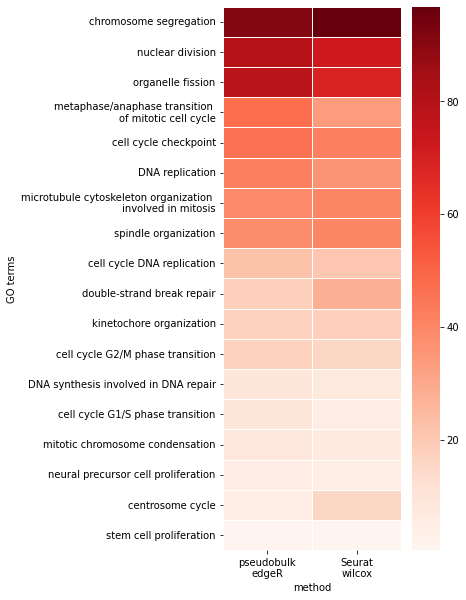

In [19]:
figsize(4,10)
sns.heatmap(df, annot=False, linewidths=.5,cmap='Reds')

# Adding labels
plt.xlabel('method')
plt.ylabel('GO terms')
plt.savefig('results/Enrichment/edgeR_seurat_GO_heatmap.pdf',dpi=300, bbox_inches='tight',transparent=True)
# Show the plot
plt.show()

## Sub-trajectory

In [ ]:
with open('/home/huang_yin/github/projA/data/results/hba_figure_new_celltype.pickle', 'rb') as handle:
    ad=pickle.load(handle)

In [ ]:
sc.pp.scale(ad)

In [ ]:
ad.layers['scale']=ad.X.copy()

In [ ]:
mmg1=['SLC1A3','SOX2','GFAP','HMGB2','MKI67','SOX4','NNAT','PROX1','NPY1R','ERC2','CPLX2']

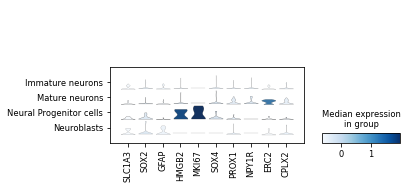

In [ ]:
sc.pl.stacked_violin(ad, var_names=[i for i in mmg1 if i in ad.var.index], groupby='louvain2', rotation=90,layer='scale')

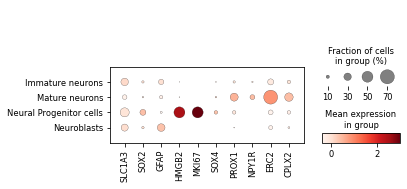

In [ ]:
sc.pl.dotplot(ad, var_names=[i for i in mmg1 if i in ad.var.index], groupby='louvain2', dendrogram=False,layer='scale')

In [ ]:
npc_markers=["TOP2A" , "RRM2"  , "SMC4"  , "BEST3",  "CDC25C", "TPX2" ,  "MKI67" , "NCAPG",  "CENPK" , "BRCA2" ]

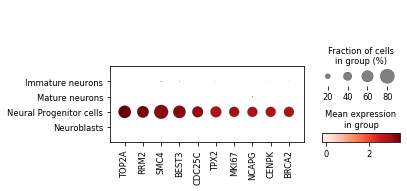

In [ ]:
sc.pl.dotplot(ad, var_names=npc_markers, groupby='louvain2', dendrogram=False,layer='scale')

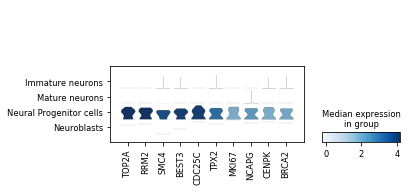

In [ ]:
sc.pl.stacked_violin(ad, var_names=npc_markers, groupby='louvain2', dendrogram=False,layer='scale',legend_loc='right margin',rotation=90
            )


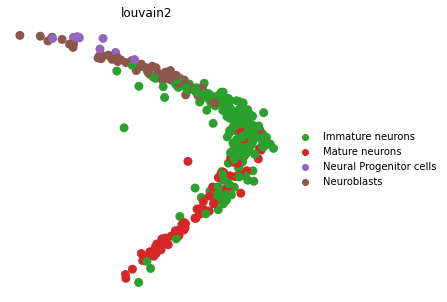

In [ ]:
figsize(5,5)
sc.pl.draw_graph(ad, color=['louvain2'], frameon=False,ncols=1)

In [ ]:
import scanpy.external as sce

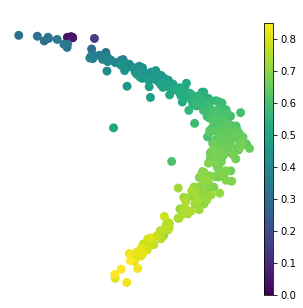

In [ ]:
figsize(5,5)
sc.pl.draw_graph(ad, color=['dpt_pseudotime'], frameon=False,ncols=1,title=' ')

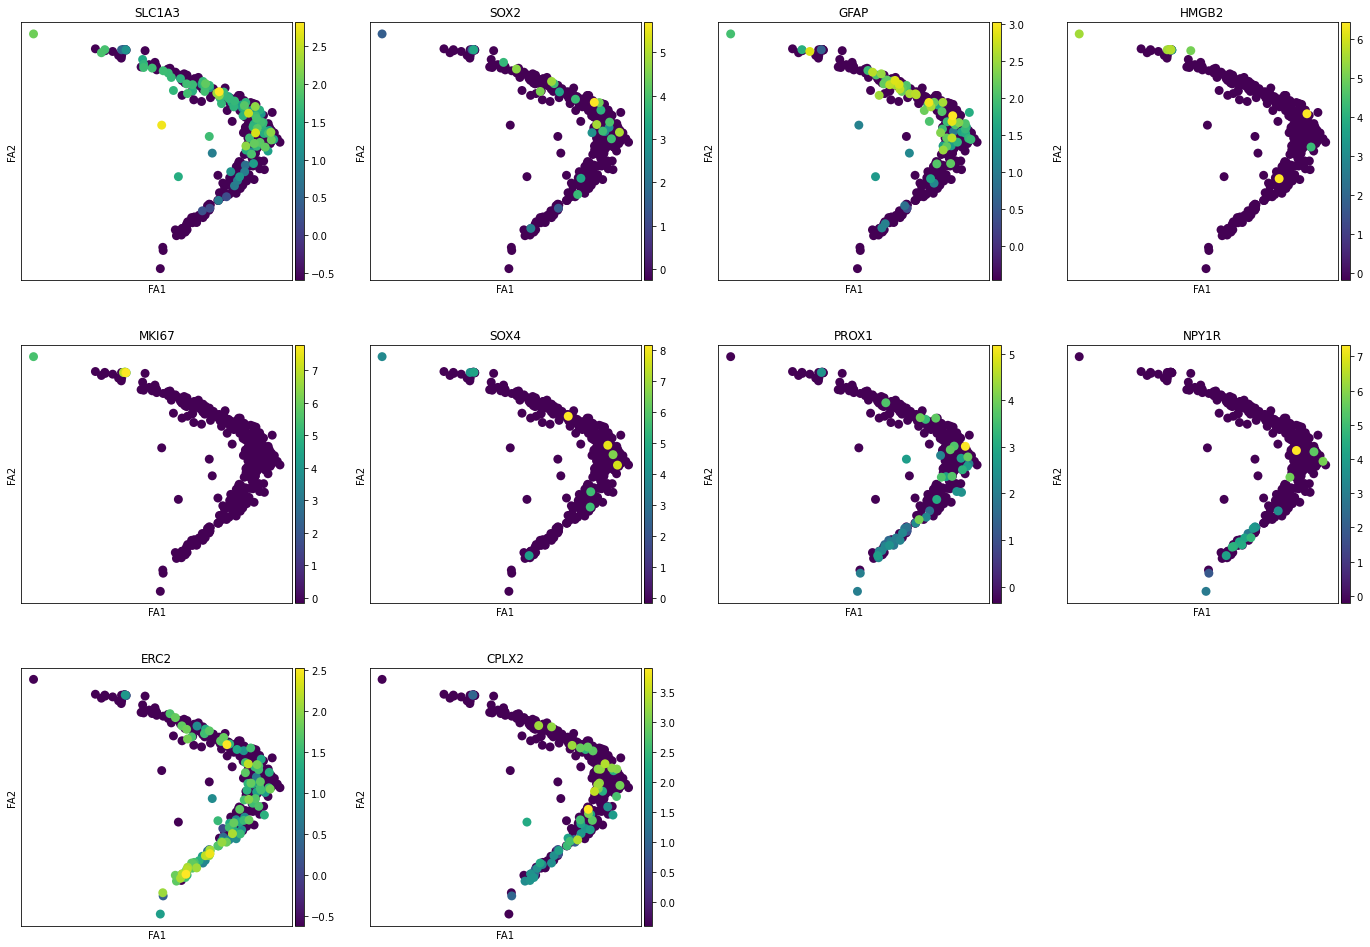

In [ ]:
sc.pl.draw_graph(ad, color=[i for i in mmg1 if i in ad.var.index], legend_loc='on data',layer='scale')

## RNA velocity

In [ ]:
import os
from glob import iglob
import scvelo as scv
import scanpy as sc
import anndata
import pandas as pd
import numpy as np
import pickle
scv.logging.print_version()

Running scvelo 0.2.5 (python 3.7.12) on 2023-06-16 16:44.


In [ ]:
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization

In [ ]:
adata = sc.read('scvelo_raw_newcells.h5ad')

In [ ]:
scv.pp.filter_and_normalize(adata, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

Normalized count data: spliced, unspliced.
Extracted 2000 highly variable genes.
computing neighbors
    finished (0:00:11) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [ ]:
scv.tl.velocity(adata)

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [ ]:
scv.tl.velocity_graph(adata)

computing velocity graph (using 1/128 cores)
or disable the progress bar using `show_progress_bar=False`.
    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


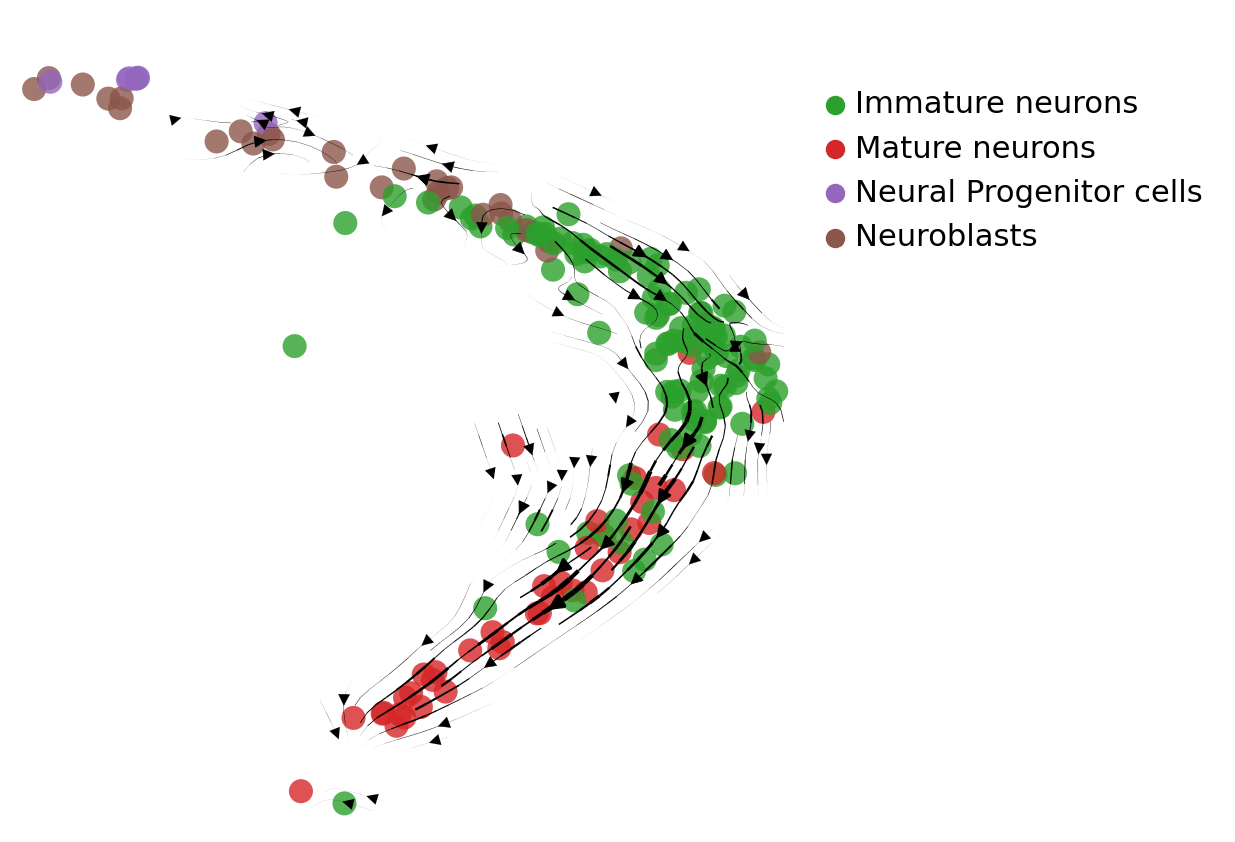

In [ ]:
figsize(5,5)
scv.pl.velocity_embedding_stream(adata,density=2,smooth=0.8,alpha=0.8,arrow_style='<|-', basis='draw_graph_fa', color='louvain2', size=300, title=' ',legend_loc=None,xlim=[-10000,54000],ylim=[-66000,51000])